# Lang compositional analysis

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [4]:
common_config.figure_journal_basic()

In [5]:
import pertpy as pt
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [6]:
adata = sc.read_h5ad("230114_hPCLS_perturbation.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 63581 × 17343
    obs: 'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'QC_group_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'timepoint_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs

condition modality patient treatment  \
muc31175_AAACCCAAGATCCCGC  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCAAGTAAAGCT  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACAAGTTGGG  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACACCAAAGG  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACACCTCGTT  Fibrotic Cocktail     PCLS       2        FC   
...                                      ...      ...     ...       ...   
muc24279_TTTGATCGTTAGTCGT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGATCGTTCCCACT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGGAGCACGATAGG  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGTTGCAAGACAAT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGTTGTCGATACGT  Fibrotic Cocktail     PCLS       1        FC   

                          identifier  n_counts  n_genes  percent_mito  \
muc31175_AAACCCAAGATCCCGC   muc31175     735.0      481      0.073469   
muc31175_AAACCCAAGTAAAGCT   muc31175    4782.0     2074      0.035968   
muc31175_AAACCCACAAGTTGGG   muc31175    1304.0      773      0.007669   
muc31175_AAACCCACACCAAAGG   muc31175    1986.0     1118      0.043807   
muc31175_AAACCCACACCTCGTT   muc31175    2049.0      986      0.060517   
...                              ...       ...      ...           ...   
muc24279_TTTGATCGTTAGTCGT   muc24279   10589.0     3476      0.014166   
muc24279_TTTGATCGTTCCCACT   muc24279     658.0      438      0.004559   
muc24279_TTTGGAGCACGATAGG   muc24279    5930.0     2419      0.037605   
muc24279_TTTGTTGCAAGACAAT   muc24279    2786.0     1487      0.045226   
muc24279_TTTGTTGTCGATACGT   muc24279    9054.0     3493      0.071571   

                          QC_group  doublet_scores  size_factors leiden_1  \
muc31175_AAACCCAAGATCCCGC      low        0.051087      0.101679        0   
muc31175_AAACCCAAGTAAAGCT      low        0.020891      0.772610        4   
muc31175_AAACCCACAAGTTGGG      low        0.027234      0.188760        1   
muc31175_AAACCCACACCAAAGG      low        0.164641      0.300193        1   
muc31175_AAACCCACACCTCGTT      low        0.138672      0.283763       21   
...                            ...             ...           ...      ...   
muc24279_TTTGATCGTTAGTCGT   medium        0.050000      1.779824        2   
muc24279_TTTGATCGTTCCCACT   medium        0.047490      0.107031       17   
muc24279_TTTGGAGCACGATAGG   medium        0.038509      0.972865       15   
muc24279_TTTGTTGCAAGACAAT   medium        0.042802      0.472818       19   
muc24279_TTTGTTGTCGATACGT   medium        0.036496      1.735684        4   

                          leiden_2     cell_type cell_type_group sample  
muc31175_AAACCCAAGATCCCGC        7       T cells         T cells   FC_2  
muc31175_AAACCCAAGTAAAGCT        2    ectopic EC     vascular EC   FC_2  
muc31175_AAACCCACAAGTTGGG        0    Mast cells      Mast cells   FC_2  
muc31175_AAACCCACACCAAAGG        0    Mast cells      Mast cells   FC_2  
muc31175_AAACCCACACCTCGTT       33       B cells         B cells   FC_2  
...                            ...           ...             ...    ...  
muc24279_TTTGATCGTTAGTCGT        5  capillary EC    capillary EC   FC_1  
muc24279_TTTGATCGTTCCCACT       18   Fibroblasts     Fibroblasts   FC_1  
muc24279_TTTGGAGCACGATAGG       14     Pericytes   SMC/Pericytes   FC_1  
muc24279_TTTGTTGCAAGACAAT       20    Mast cells      Mast cells   FC_1  
muc24279_TTTGTTGTCGATACGT        2    ectopic EC     vascular EC   FC_1  

[63581 rows x 16 columns]

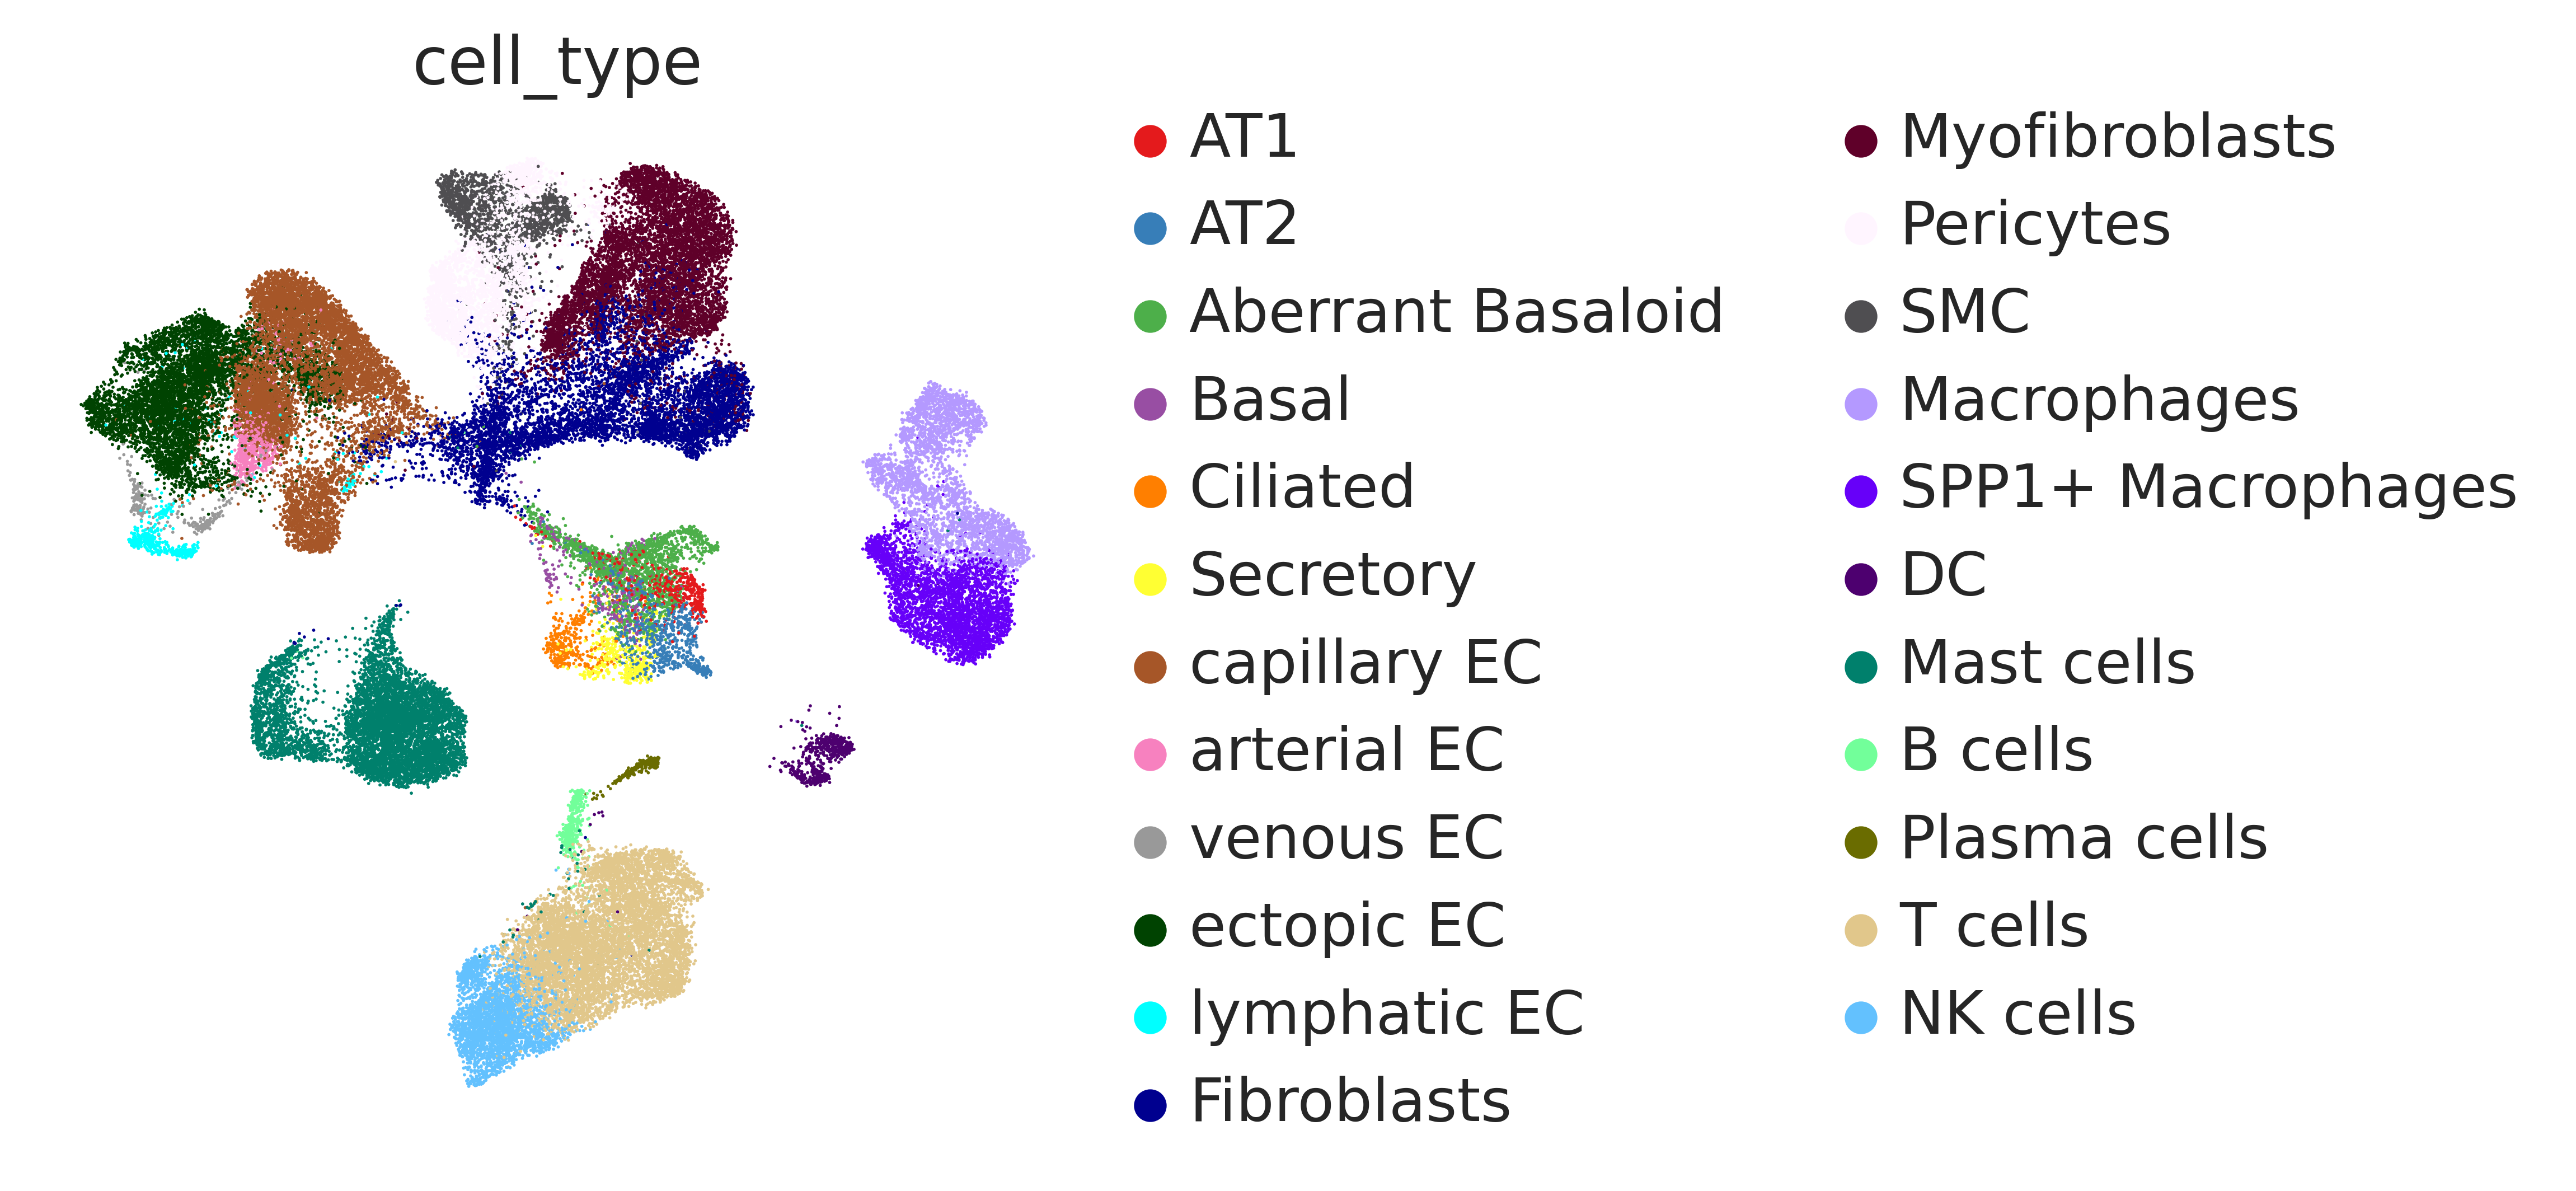

In [9]:
sc.pl.umap(adata, color="cell_type")

In [10]:
adata_fc = adata[adata.obs["treatment"].isin(["CC", "FC"])]
adata_cmp4 = adata[adata.obs["treatment"].isin(["CC", "FC+CMP4"])]
adata_nintedanib = adata[adata.obs["treatment"].isin(["CC", "FC+Nintedanib"])]

## scCODA

Automatic reference selection! Reference cell type set to lymphatic EC

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [01:25<00:00, 128.45it/s, 255 steps of size 1.58e-02. acc. prob=0.89]


                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 4 samples, 23 cell types                                    │
│ Reference cell type                         │ lymphatic EC                                                      │
│ Formula                                     │ treatment                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ AT1                    -0.154           128.770                                                                 │
│ AT2                     0.162           176.625                                                                 │
│ Aberrant Basaloid       0.663           291.497                                                                 │
│ Basal                  -0.391           101.599                                                                 │
│ Ciliated               -0.689            75.417                                                                 │
│ Secretory              -0.632            79.840                                                                 │
│ capillary EC            2.868          2643.951                                                                 │
│ arterial EC            -1.002            55.149                                                                 │
│ venous EC              -1.056            52.249                                                                 │
│ ectopic EC             -0.199           123.104                                                                 │
│ lymphatic EC           -0.282           113.299                                                                 │
│ Fibroblasts             2.432          1709.626                                                                 │
│ Myofibroblasts          0.736           313.572                                                                 │
│ Pericytes               0.918           376.166                                                                 │
│ SMC                    -0.281           113.412                                                                 │
│ Macrophages             1.287           544.044                                                                 │
│ SPP1+ Macrophages       0.438           232.765                                                                 │
│ DC                     -0.432            97.517                                                                 │
│ Mast cells              1.432           628.936                                                                 │
│ B cells                -0.436            97.128                                                                 │
│ Plasma cells           -0.664            77.326                                                                 │
│ T cells                 1.622           760.541                                                                 │
│ NK cells                0.458           237.467                                                                 │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                  Final Parameter  Expected Sample  log2-fold change                             │
│ Covariate     Cell Type                                                                                         │
│ treatmentT.FC AT1                     0.000           157.654            0.000                                  │
│               AT2                    -1.261            61.268           -1.527                                  │
│               Aberrant Basaloid       0.000           356.881            0.000                                  │
│               Basal                   0.000           124.388            0.000                                  │
│               Ciliated                0.000            92.333            0.000                                  │
│               Secretory               0.000            97.749            0.000                                  │
│               capillary EC           -1.936           467.264           -2.500                                  │
│               arterial EC             0.000            67.519            0.000                                  │
│               venous EC               0.000            63.969            0.000                                  │
│               ectopic EC              2.329          1546.964            3.651                                  │
│               lymphatic EC            0.000           138.712            0.000                                  │
│               Fibroblasts            -1.166           652.300           -1.390                                  │
│               Myofibroblasts          1.241          1327.708            2.082                                  │
│               Pericytes               0.000           460.541            0.000                                  │
│               SMC                     0.000           138.851            0.000                                  │
│               Macrophages             0.000           666.075            0.000                                  │
│               SPP1+ Macrophages       0.000           284.975            0.000                                  │
│               DC                      0.000           119.391            0.000                                  │
│               Mast cells              0.000           770.009            0.000                                  │
│               B cells                 0.000           118.914            0.000                                  │
│               Plasma cells            0.000            94.670            0.000                                  │
│               T cells                 0.000           931.133            0.000                                  │
│               NK cells                0.000           290.732            0.000                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Automatic reference selection! Reference cell type set to lymphatic EC

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:51<00:00, 211.78it/s, 127 steps of size 3.19e-02. acc. prob=0.78]


                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 4 samples, 23 cell types                                    │
│ Reference cell type                         │ lymphatic EC                                                      │
│ Formula                                     │ treatment                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ AT1                    -0.385           119.802                                                                 │
│ AT2                    -0.131           154.445                                                                 │
│ Aberrant Basaloid       0.117           197.915                                                                 │
│ Basal                  -0.464           110.701                                                                 │
│ Ciliated               -0.749            83.249                                                                 │
│ Secretory              -0.798            79.268                                                                 │
│ capillary EC            2.447          2034.157                                                                 │
│ arterial EC            -1.191            53.508                                                                 │
│ venous EC              -1.243            50.797                                                                 │
│ ectopic EC             -0.414           116.377                                                                 │
│ lymphatic EC           -0.483           108.618                                                                 │
│ Fibroblasts             1.964          1254.932                                                                 │
│ Myofibroblasts          0.687           349.966                                                                 │
│ Pericytes               0.631           330.907                                                                 │
│ SMC                    -0.633            93.488                                                                 │
│ Macrophages             1.128           543.939                                                                 │
│ SPP1+ Macrophages       0.092           193.028                                                                 │
│ DC                     -0.691            88.220                                                                 │
│ Mast cells              1.005           480.985                                                                 │
│ B cells                -0.511           105.619                                                                 │
│ Plasma cells           -0.852            75.101                                                                 │
│ T cells                 1.250           614.517                                                                 │
│ NK cells                0.091           192.835                                                                 │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                       Final Parameter  Expected Sample  log2-fold change                        │
│ Covariate          Cell Type                                                                                    │
│ treatmentT.FC+CMP4 AT1                     0.000           145.365            0.000                             │
│                    AT2                     0.000           187.401            0.000                             │
│                    Aberrant Basaloid       0.000           240.147            0.000                             │
│                    Basal                   0.000           134.323            0.000                             │
│                    Ciliated                0.000           101.013            0.000                             │
│                    Secretory               0.000            96.183            0.000                             │
│                    capillary EC           -0.888          1015.340           -1.002                             │
│                    arterial EC             0.000            64.926            0.000                             │
│                    venous EC               0.000            61.636            0.000                             │
│                    ectopic EC              0.000           141.210            0.000                             │
│                    lymphatic EC            0.000           131.795            0.000                             │
│                    Fibroblasts            -1.070           522.219           -1.265                             │
│                    Myofibroblasts          1.113          1292.057            1.884                             │
│                    Pericytes               0.000           401.517            0.000                             │
│                    SMC                     0.000           113.437            0.000                             │
│                    Macrophages             0.000           660.007            0.000                             │
│                    SPP1+ Macrophages       0.000           234.218            0.000                             │
│                    DC                      0.000           107.045            0.000                             │
│                    Mast cells              0.000           583.620            0.000                             │
│                    B cells                 0.000           128.156            0.000                             │
│                    Plasma cells            0.000            91.127            0.000                             │
│                    T cells                 0.000           745.646            0.000                             │
│                    NK cells                0.000           233.984            0.000                             │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Automatic reference selection! Reference cell type set to Plasma cells

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [01:04<00:00, 170.61it/s, 127 steps of size 2.51e-02. acc. prob=0.84]


                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 4 samples, 23 cell types                                    │
│ Reference cell type                         │ Plasma cells                                                      │
│ Formula                                     │ treatment                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ AT1                    -0.514           116.188                                                                 │
│ AT2                    -0.315           141.771                                                                 │
│ Aberrant Basaloid       0.227           243.767                                                                 │
│ Basal                  -0.591           107.577                                                                 │
│ Ciliated               -0.950            75.129                                                                 │
│ Secretory              -0.874            81.062                                                                 │
│ capillary EC            2.438          2224.331                                                                 │
│ arterial EC            -1.316            52.102                                                                 │
│ venous EC              -1.213            57.755                                                                 │
│ ectopic EC             -0.286           145.942                                                                 │
│ lymphatic EC           -0.570           109.860                                                                 │
│ Fibroblasts             1.981          1408.402                                                                 │
│ Myofibroblasts          0.569           343.165                                                                 │
│ Pericytes               0.489           316.781                                                                 │
│ SMC                    -0.381           132.716                                                                 │
│ Macrophages             0.803           433.639                                                                 │
│ SPP1+ Macrophages      -0.177           162.749                                                                 │
│ DC                     -0.600           106.614                                                                 │
│ Mast cells              1.078           570.898                                                                 │
│ B cells                -0.578           108.985                                                                 │
│ Plasma cells           -0.890            79.775                                                                 │
│ T cells                 1.338           740.415                                                                 │
│ NK cells                0.121           219.250                                                                 │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                             Final Parameter  Expected Sample  log2-fold change                  │
│ Covariate                Cell Type                                                                              │
│ treatmentT.FC+Nintedanib AT1                     0.000           127.071            0.000                       │
│                          AT2                     0.000           155.049            0.000                       │
│                          Aberrant Basaloid       0.000           266.598            0.000                       │
│                          Basal                   0.000           117.653            0.000                       │
│                          Ciliated                0.000            82.166            0.000                       │
│                          Secretory               0.000            88.654            0.000                       │
│                          capillary EC           -1.459           565.771           -1.975                       │
│                          arterial EC             0.000            56.982            0.000                       │
│                          venous EC               0.000            63.165            0.000                       │
│                          ectopic EC              1.296           583.388            1.999                       │
│                          lymphatic EC            0.000           120.150            0.000                       │
│                          Fibroblasts             0.000          1540.317            0.000                       │
│                          Myofibroblasts          1.049          1071.107            1.642                       │
│                          Pericytes               0.000           346.452            0.000                       │
│                          SMC                     0.000           145.146            0.000                       │
│                          Macrophages             0.000           474.254            0.000                       │
│                          SPP1+ Macrophages       0.000           177.993            0.000                       │
│                          DC                      0.000           116.599            0.000                       │
│                          Mast cells              0.000           624.370            0.000                       │
│                          B cells                 0.000           119.193            0.000                       │
│                          Plasma cells            0.000            87.247            0.000                       │
│                          T cells                 0.000           809.764            0.000                       │
│                          NK cells                0.000           239.785            0.000                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

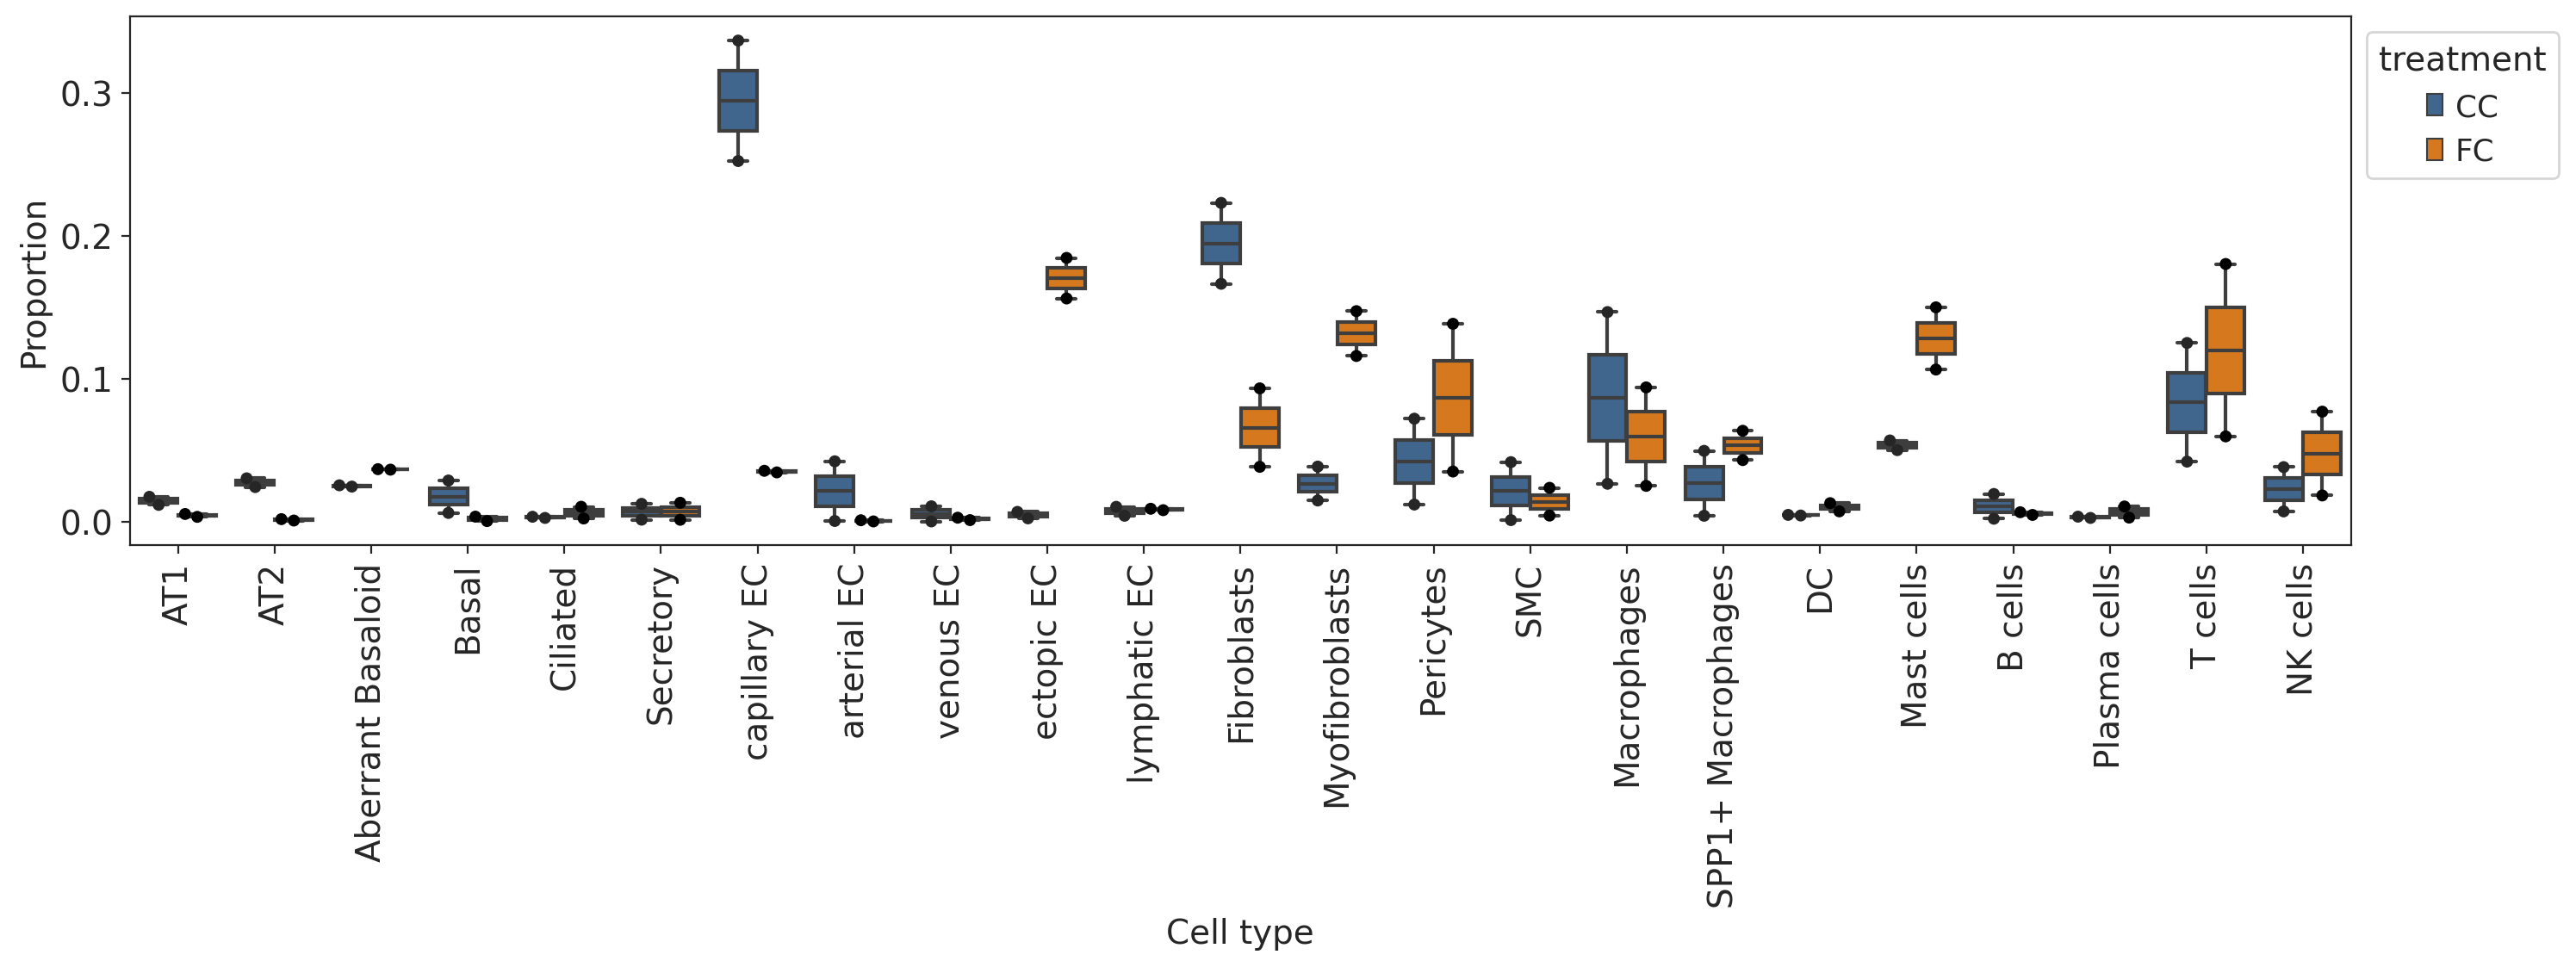

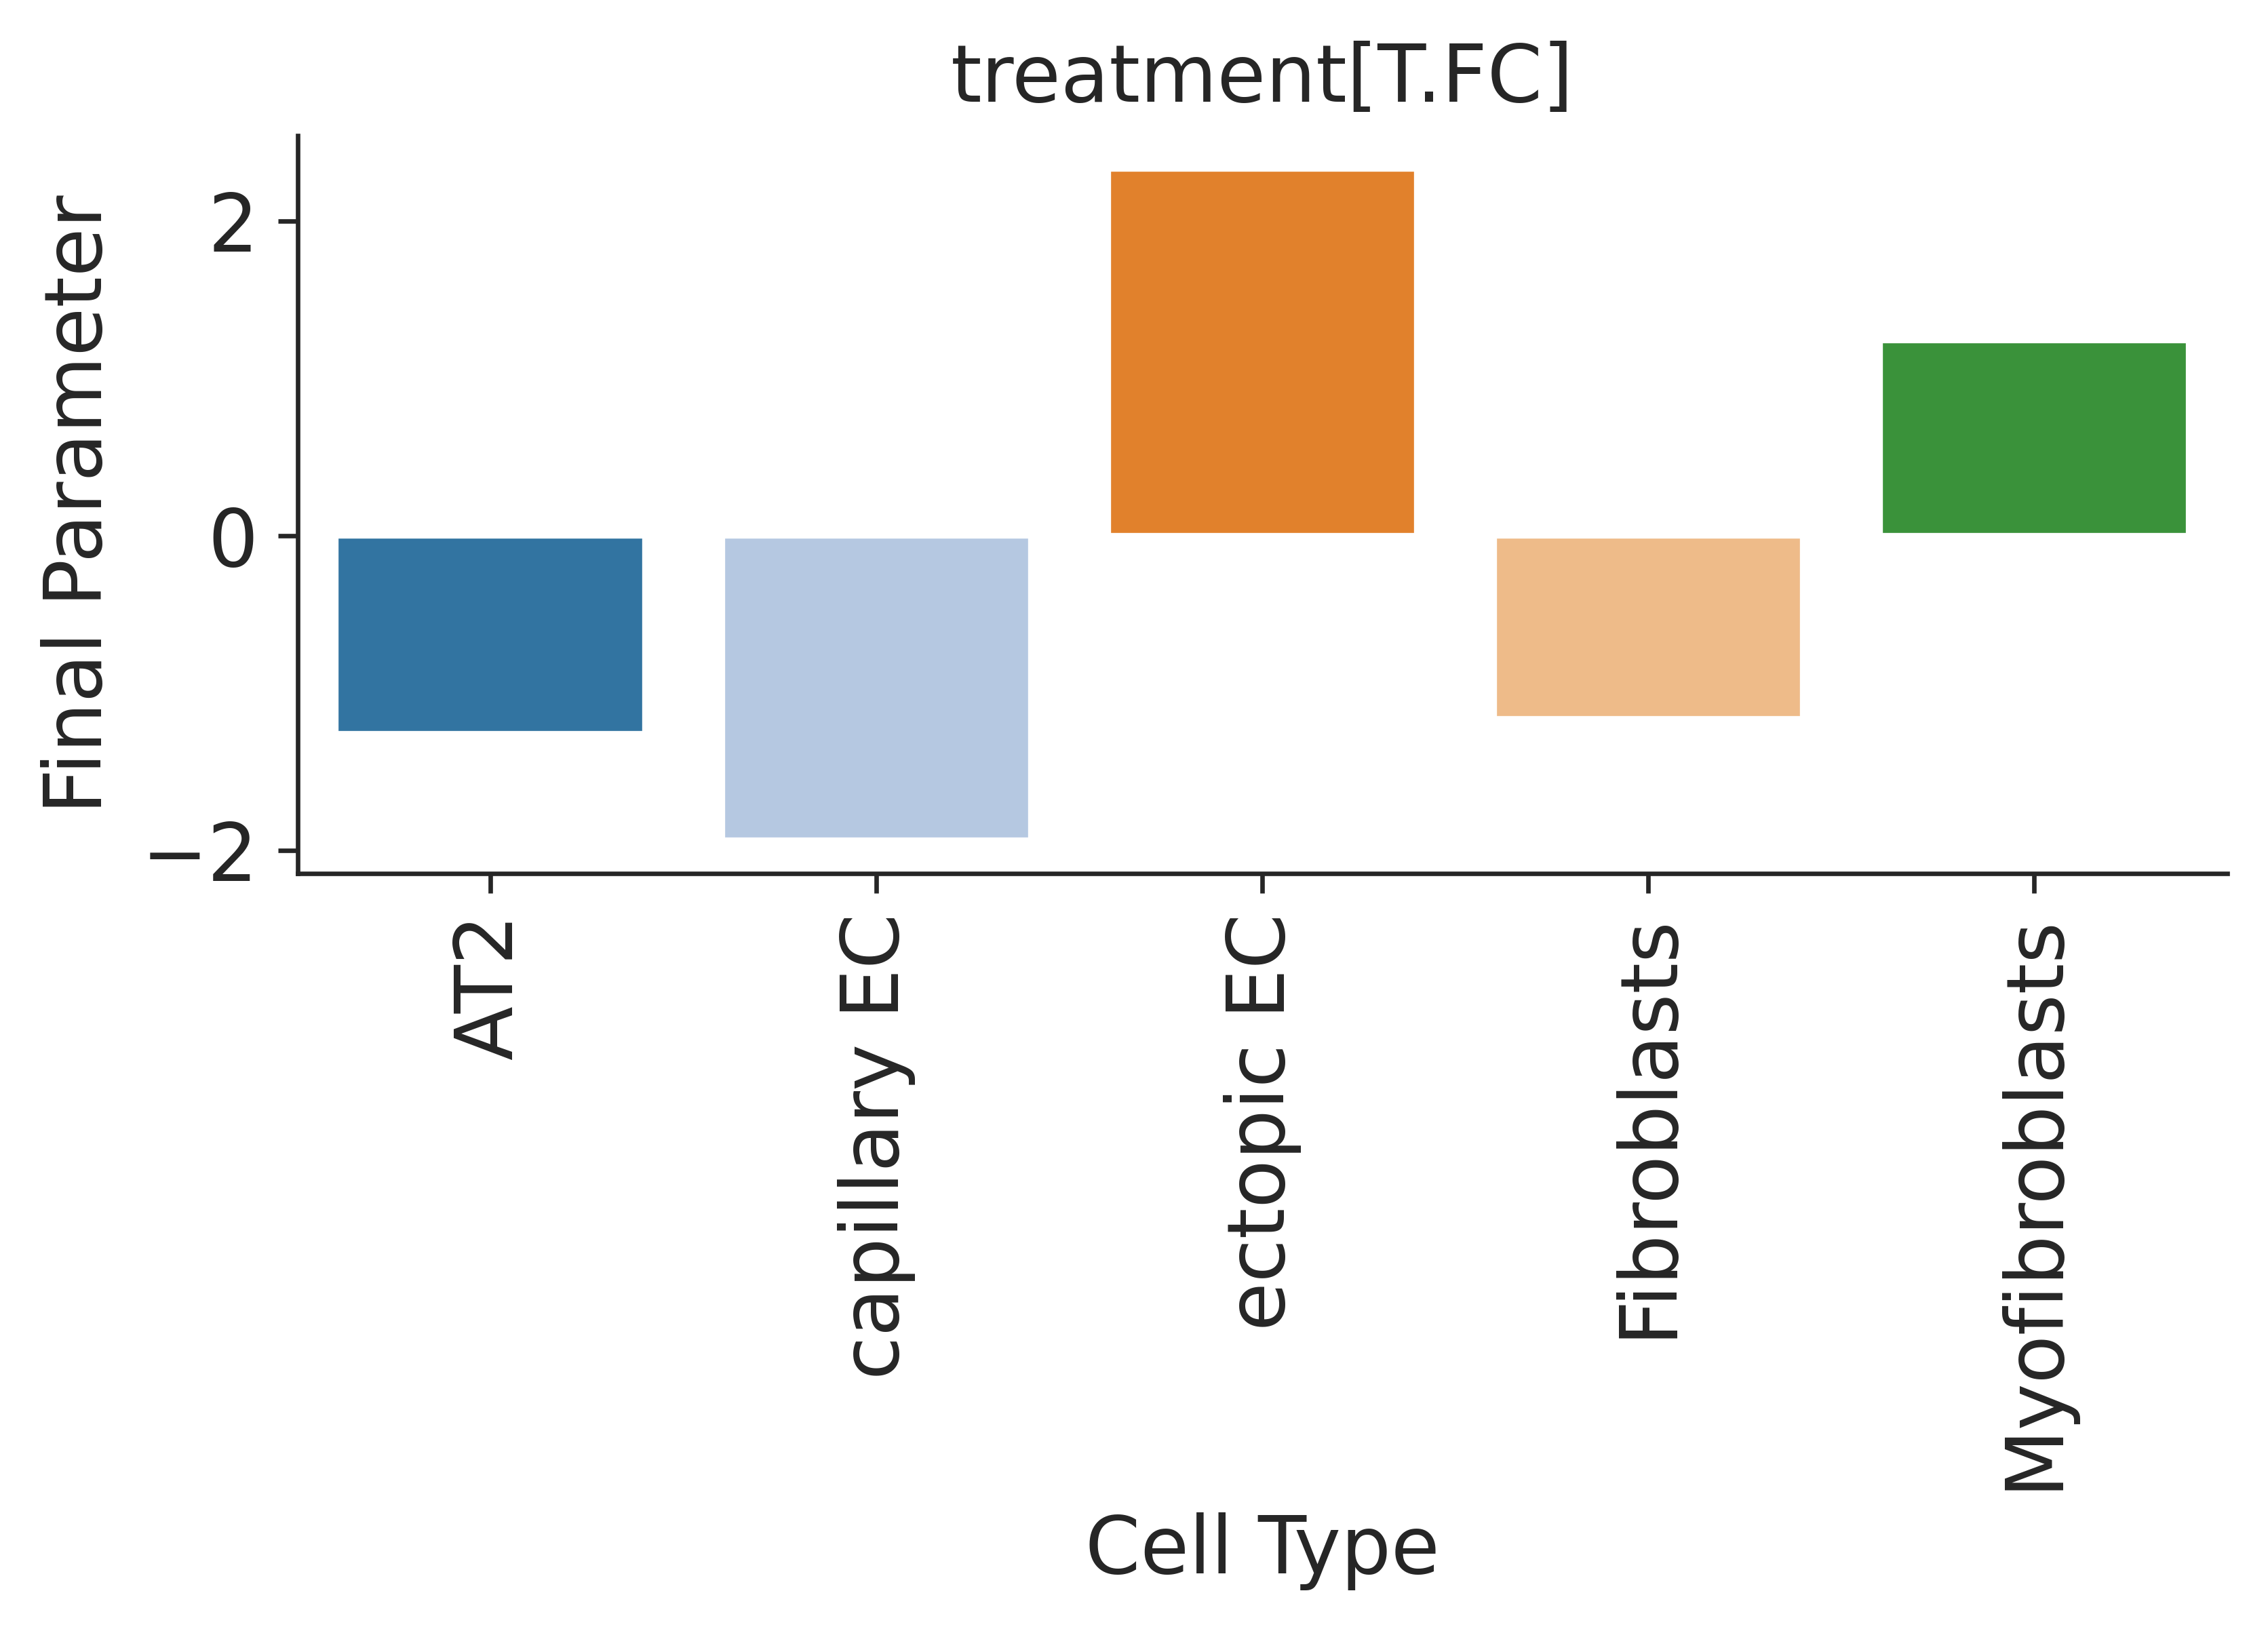

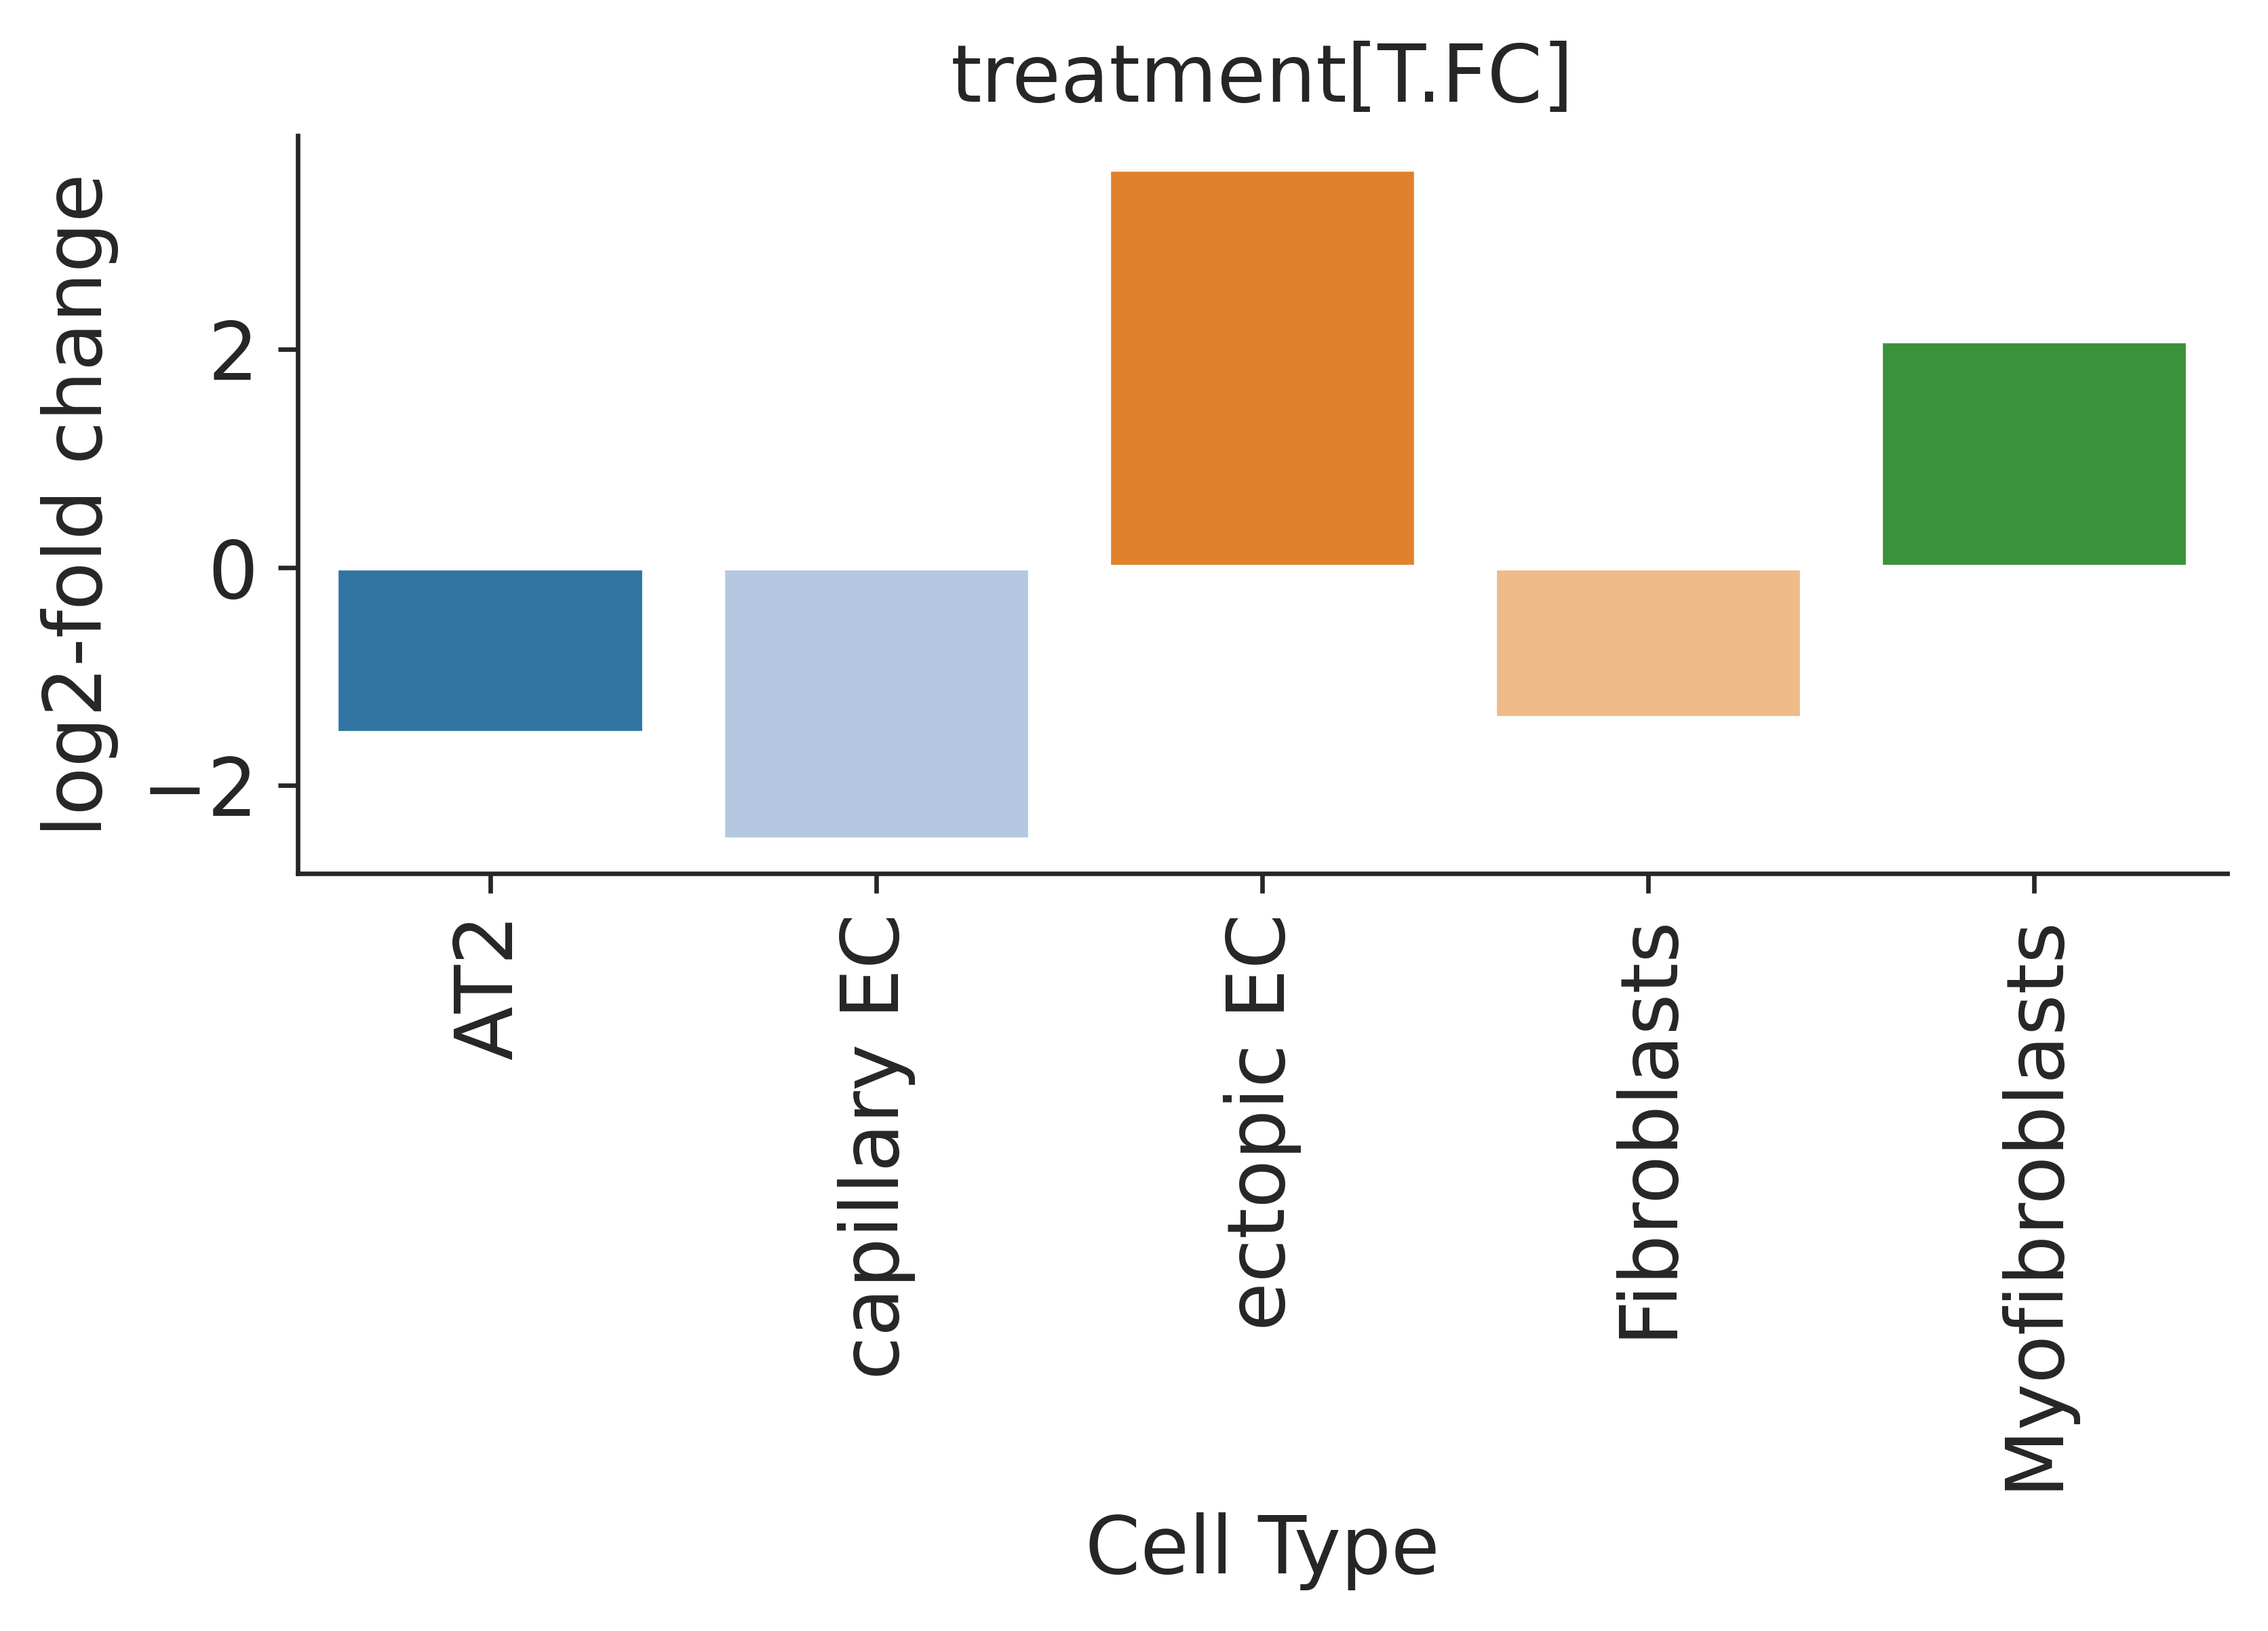

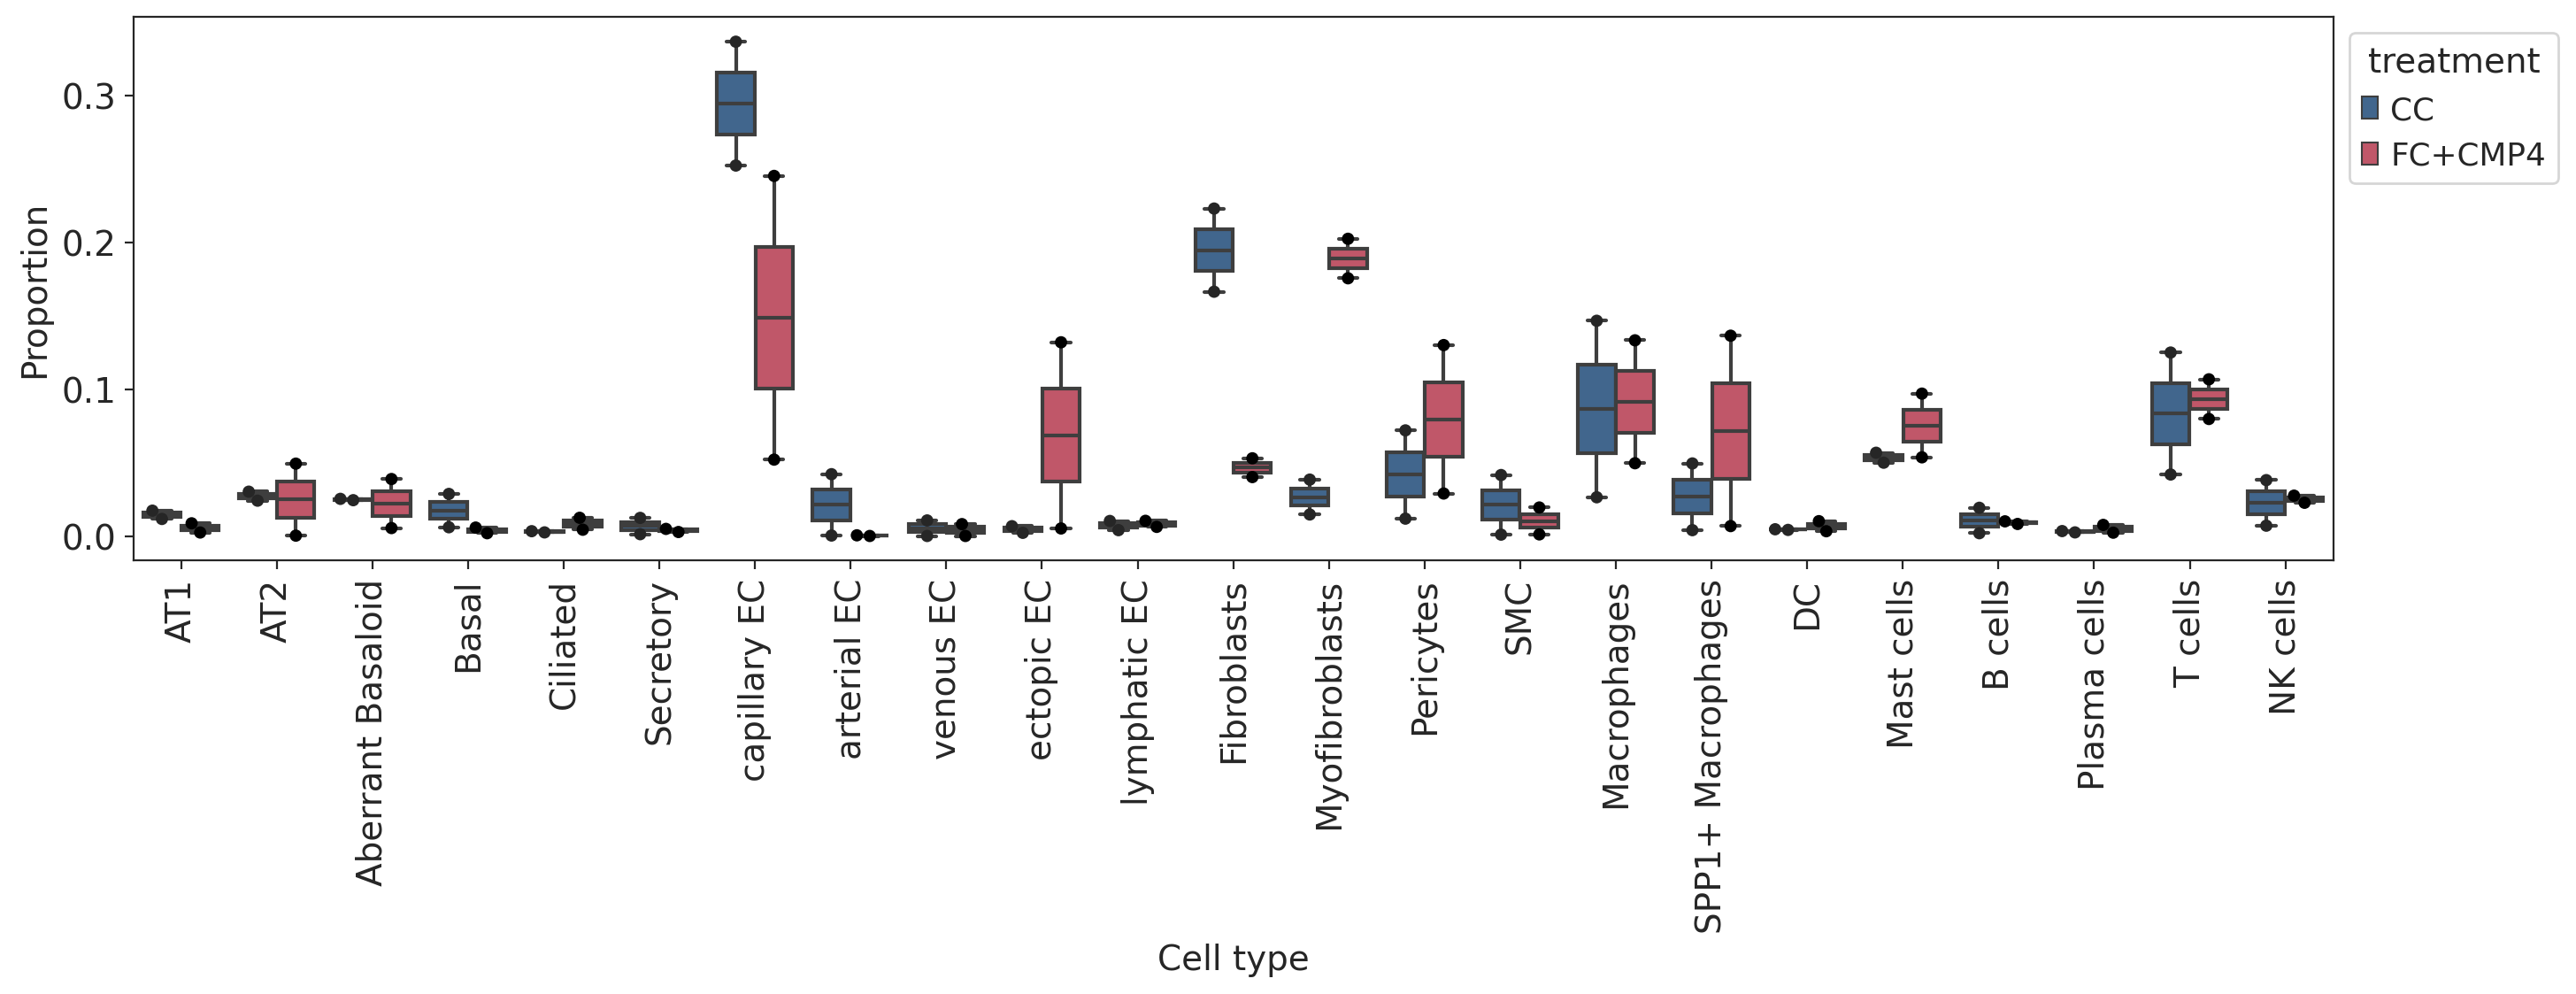

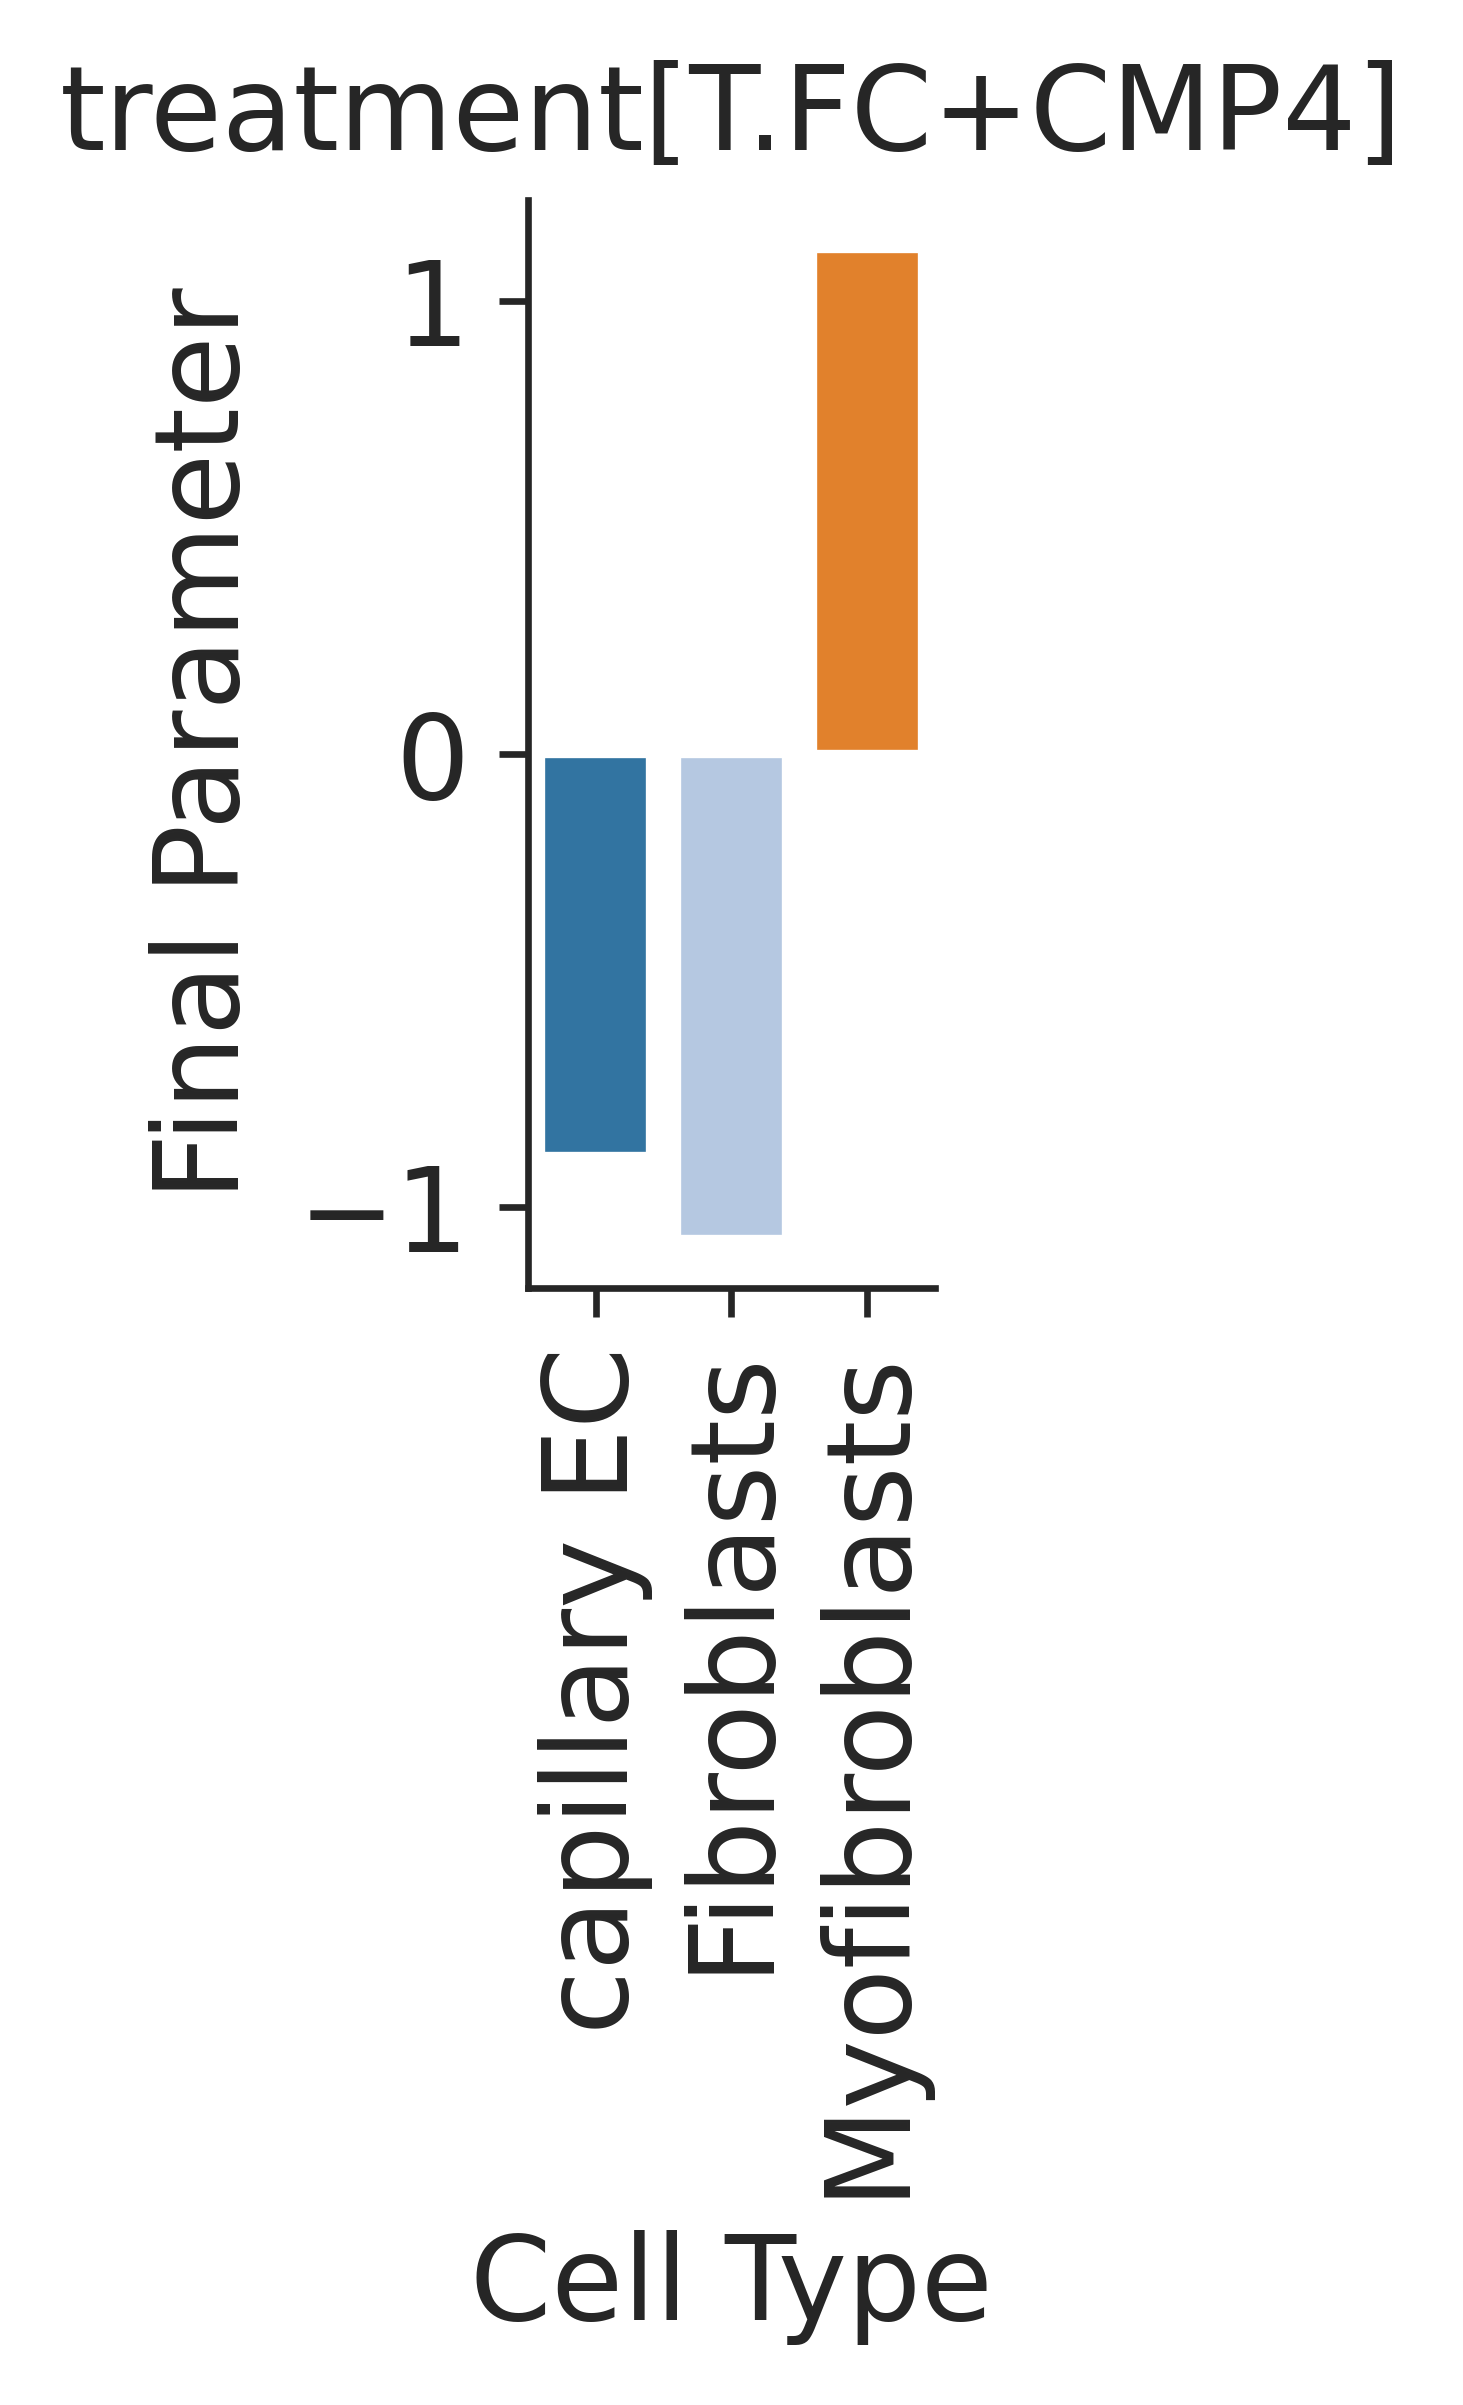

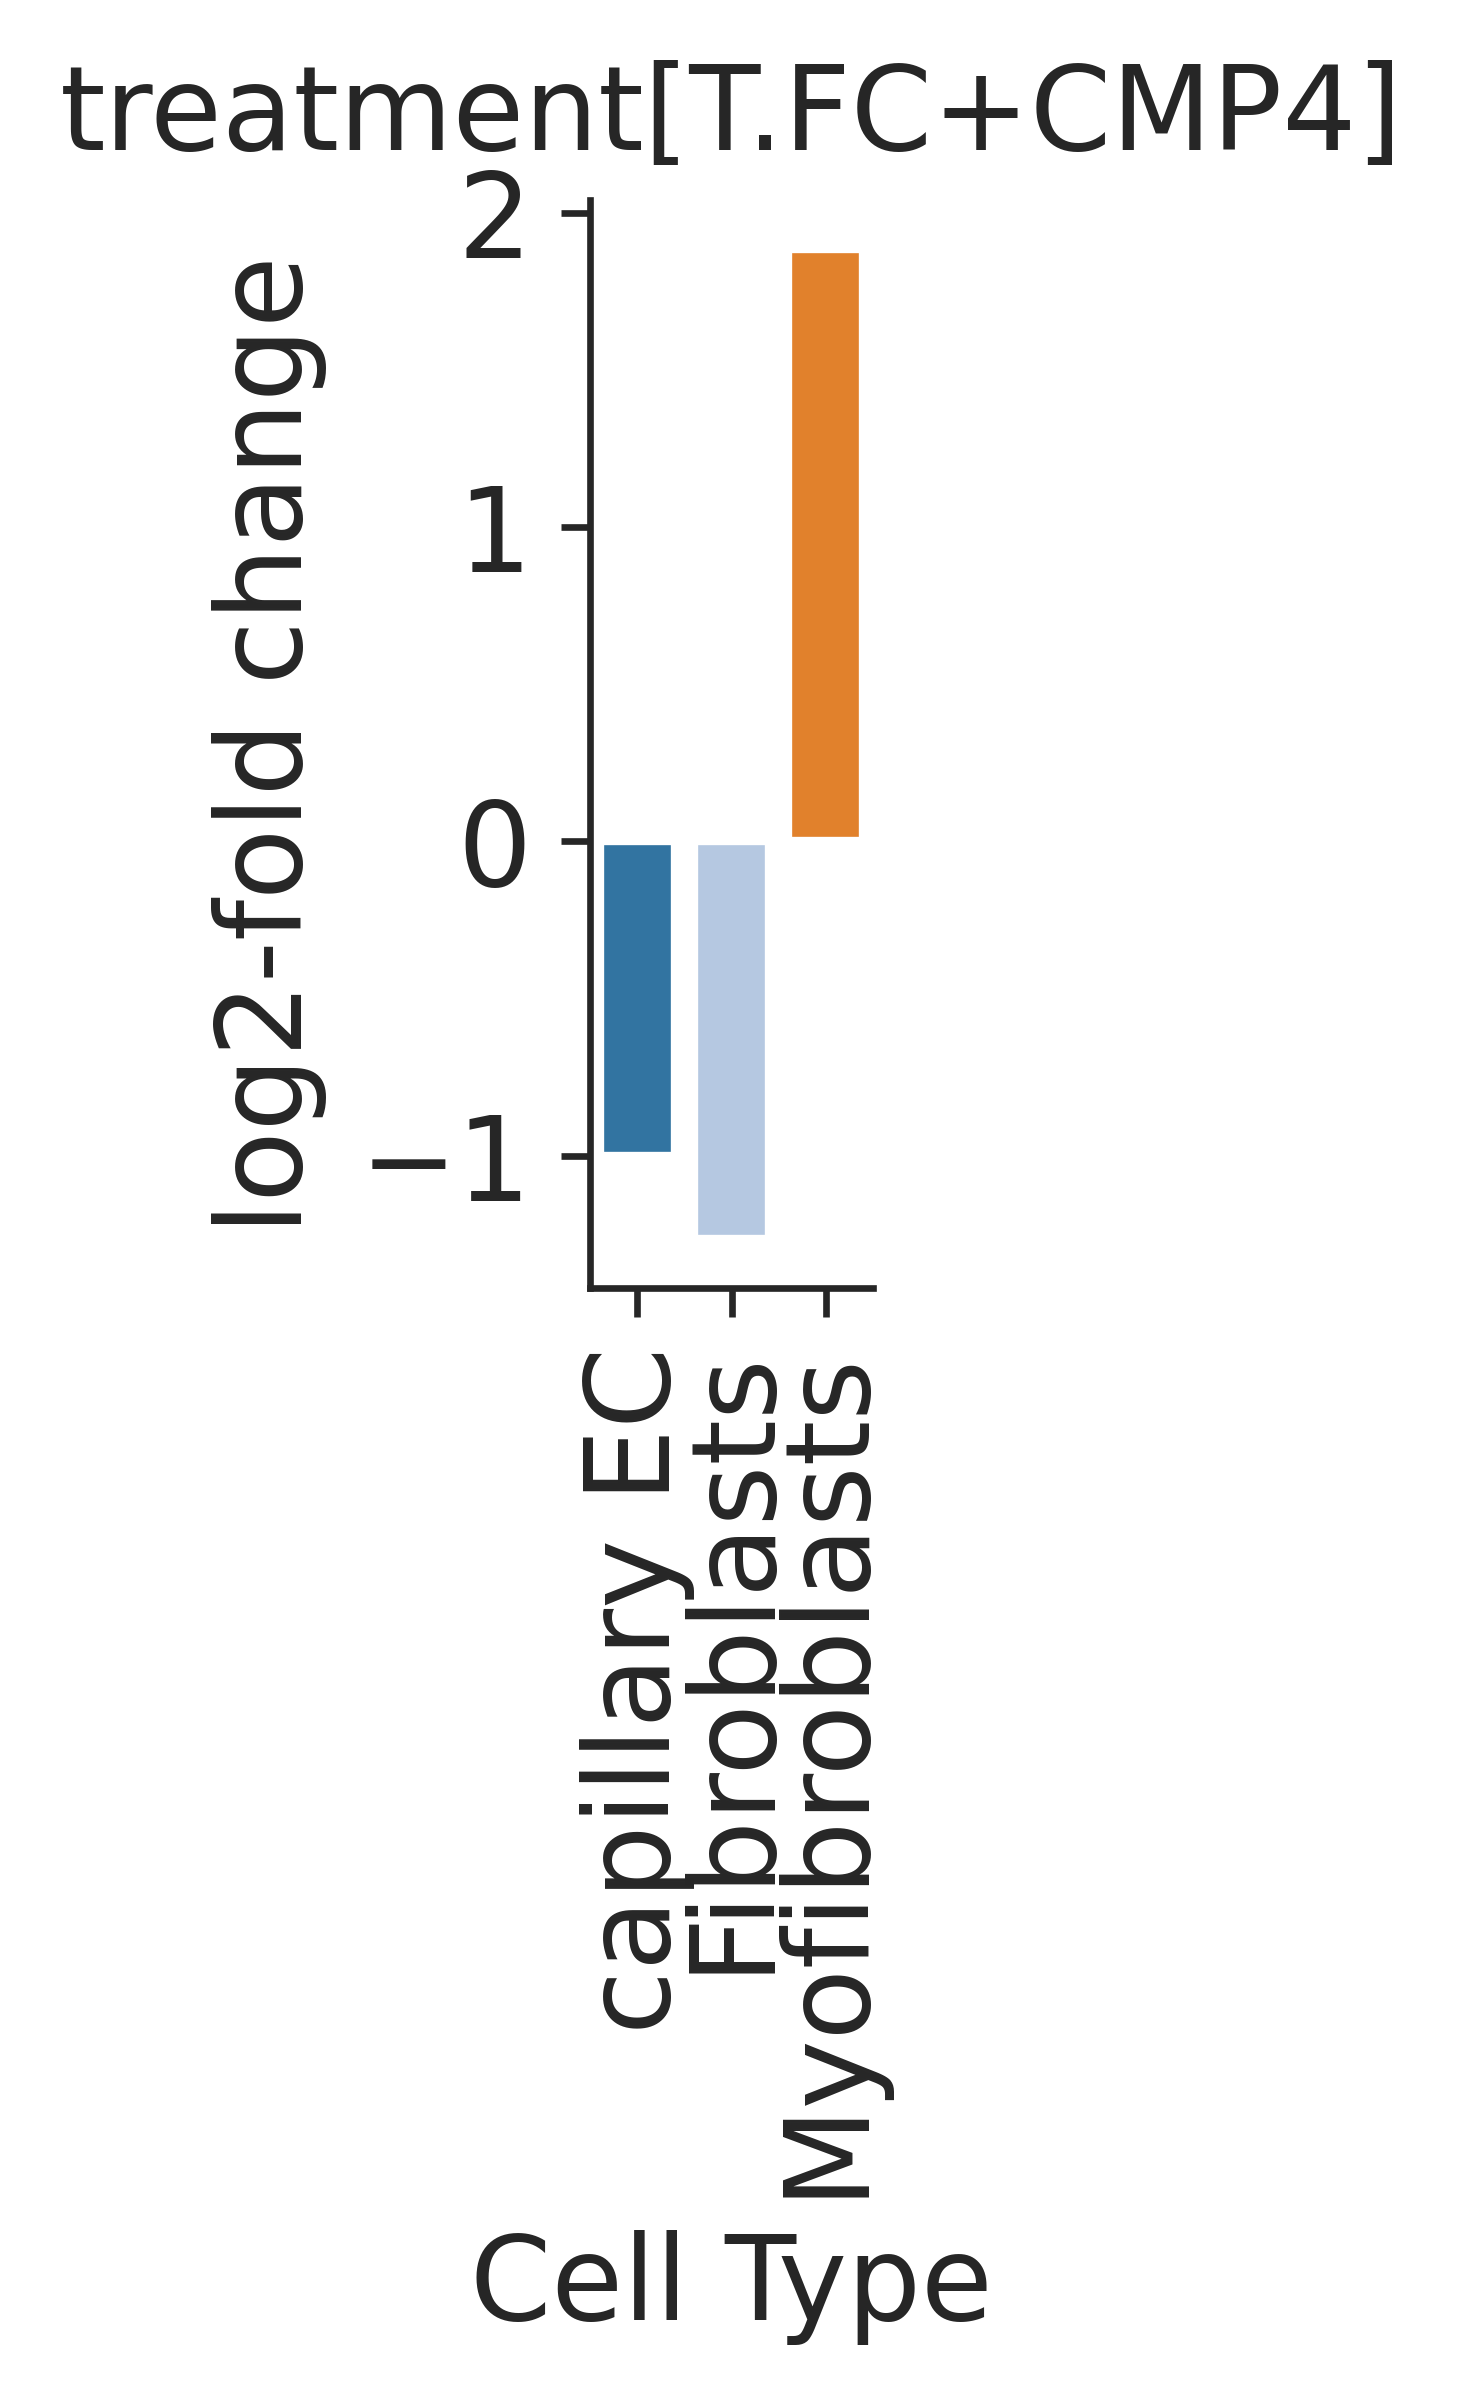

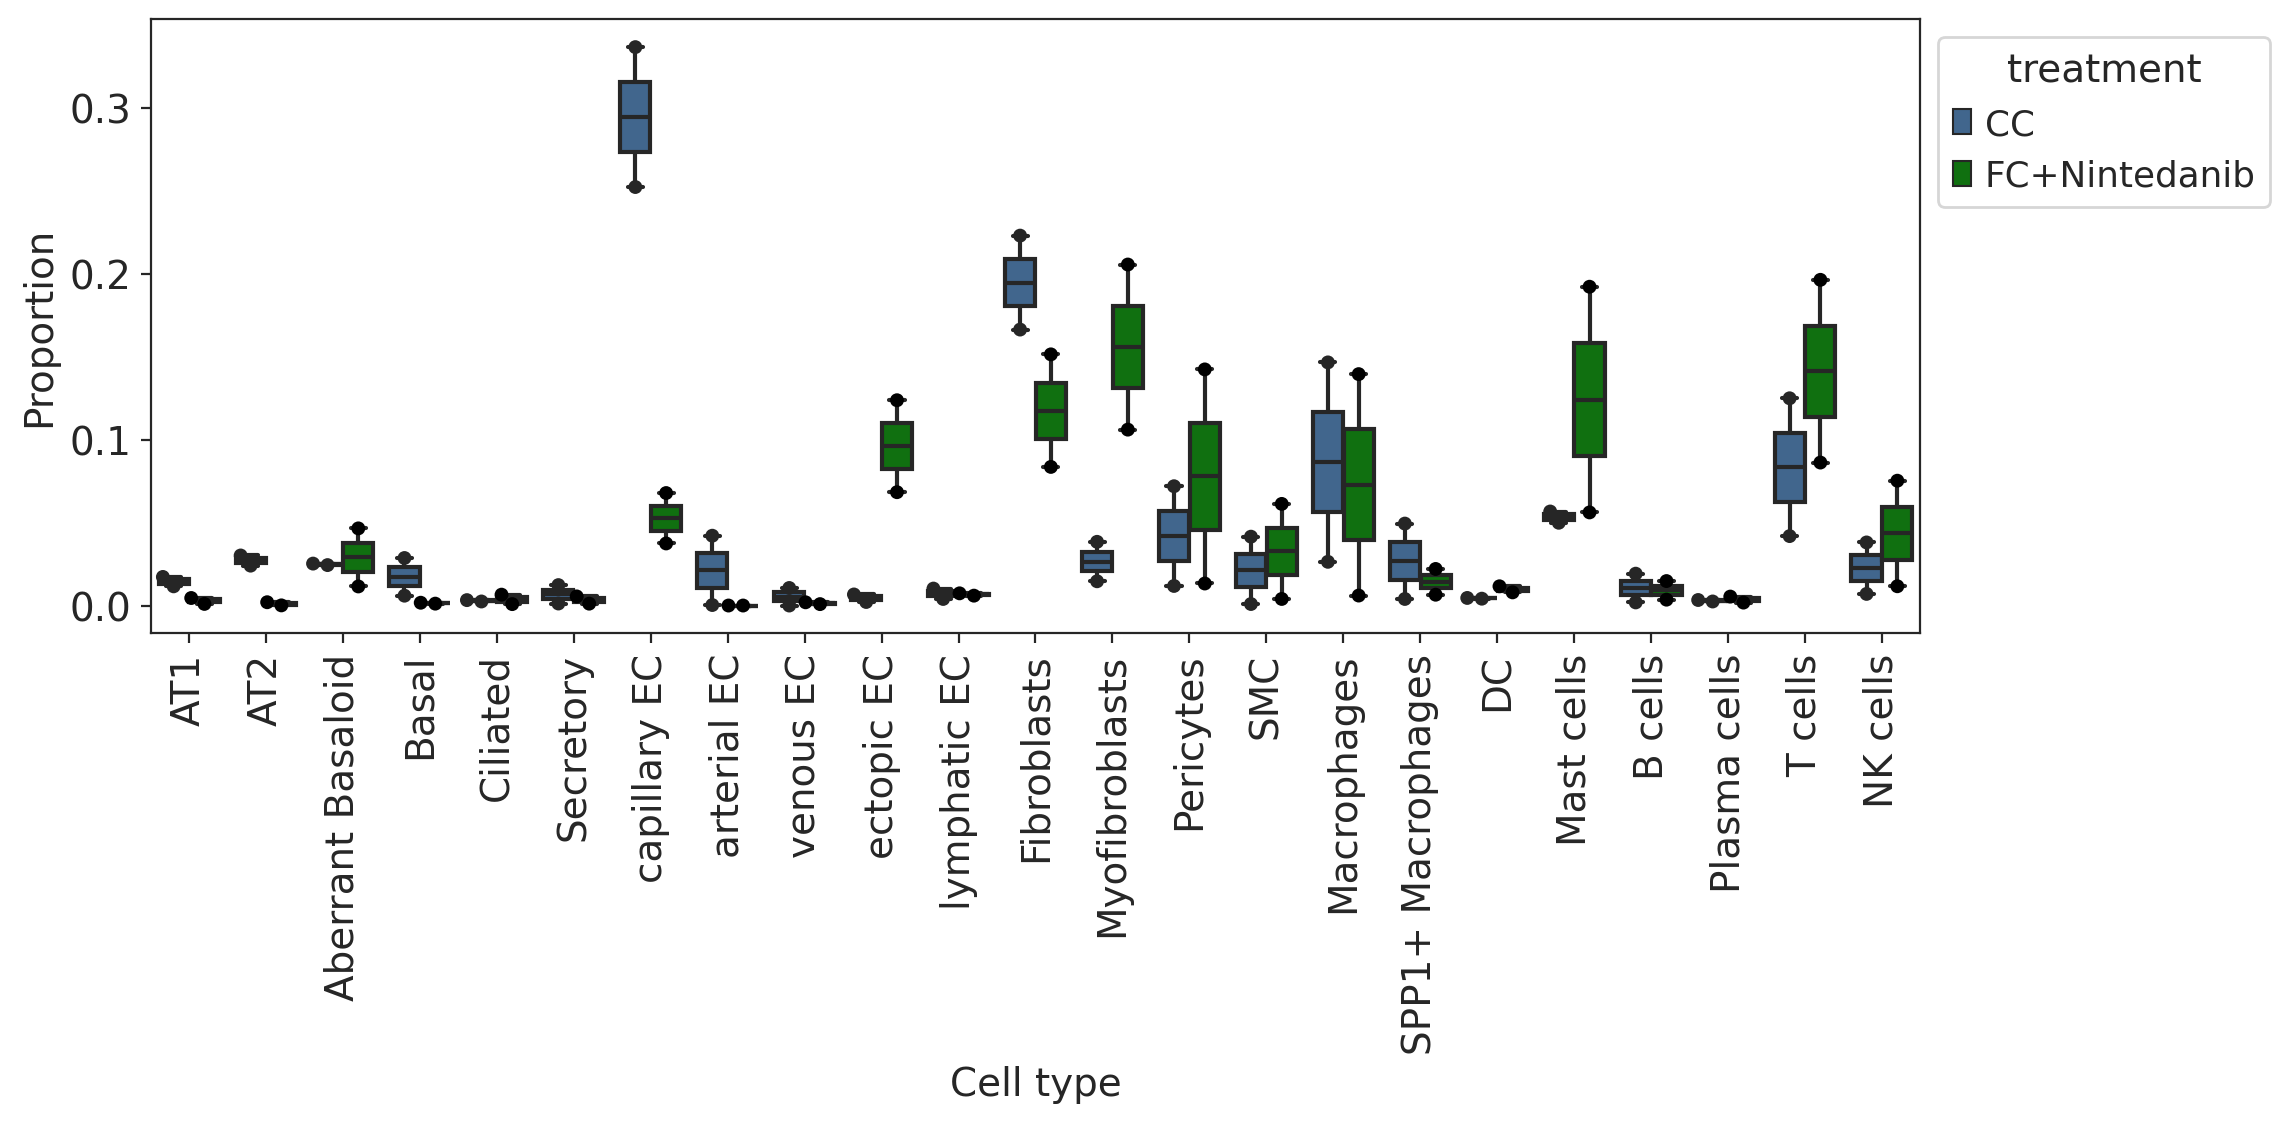

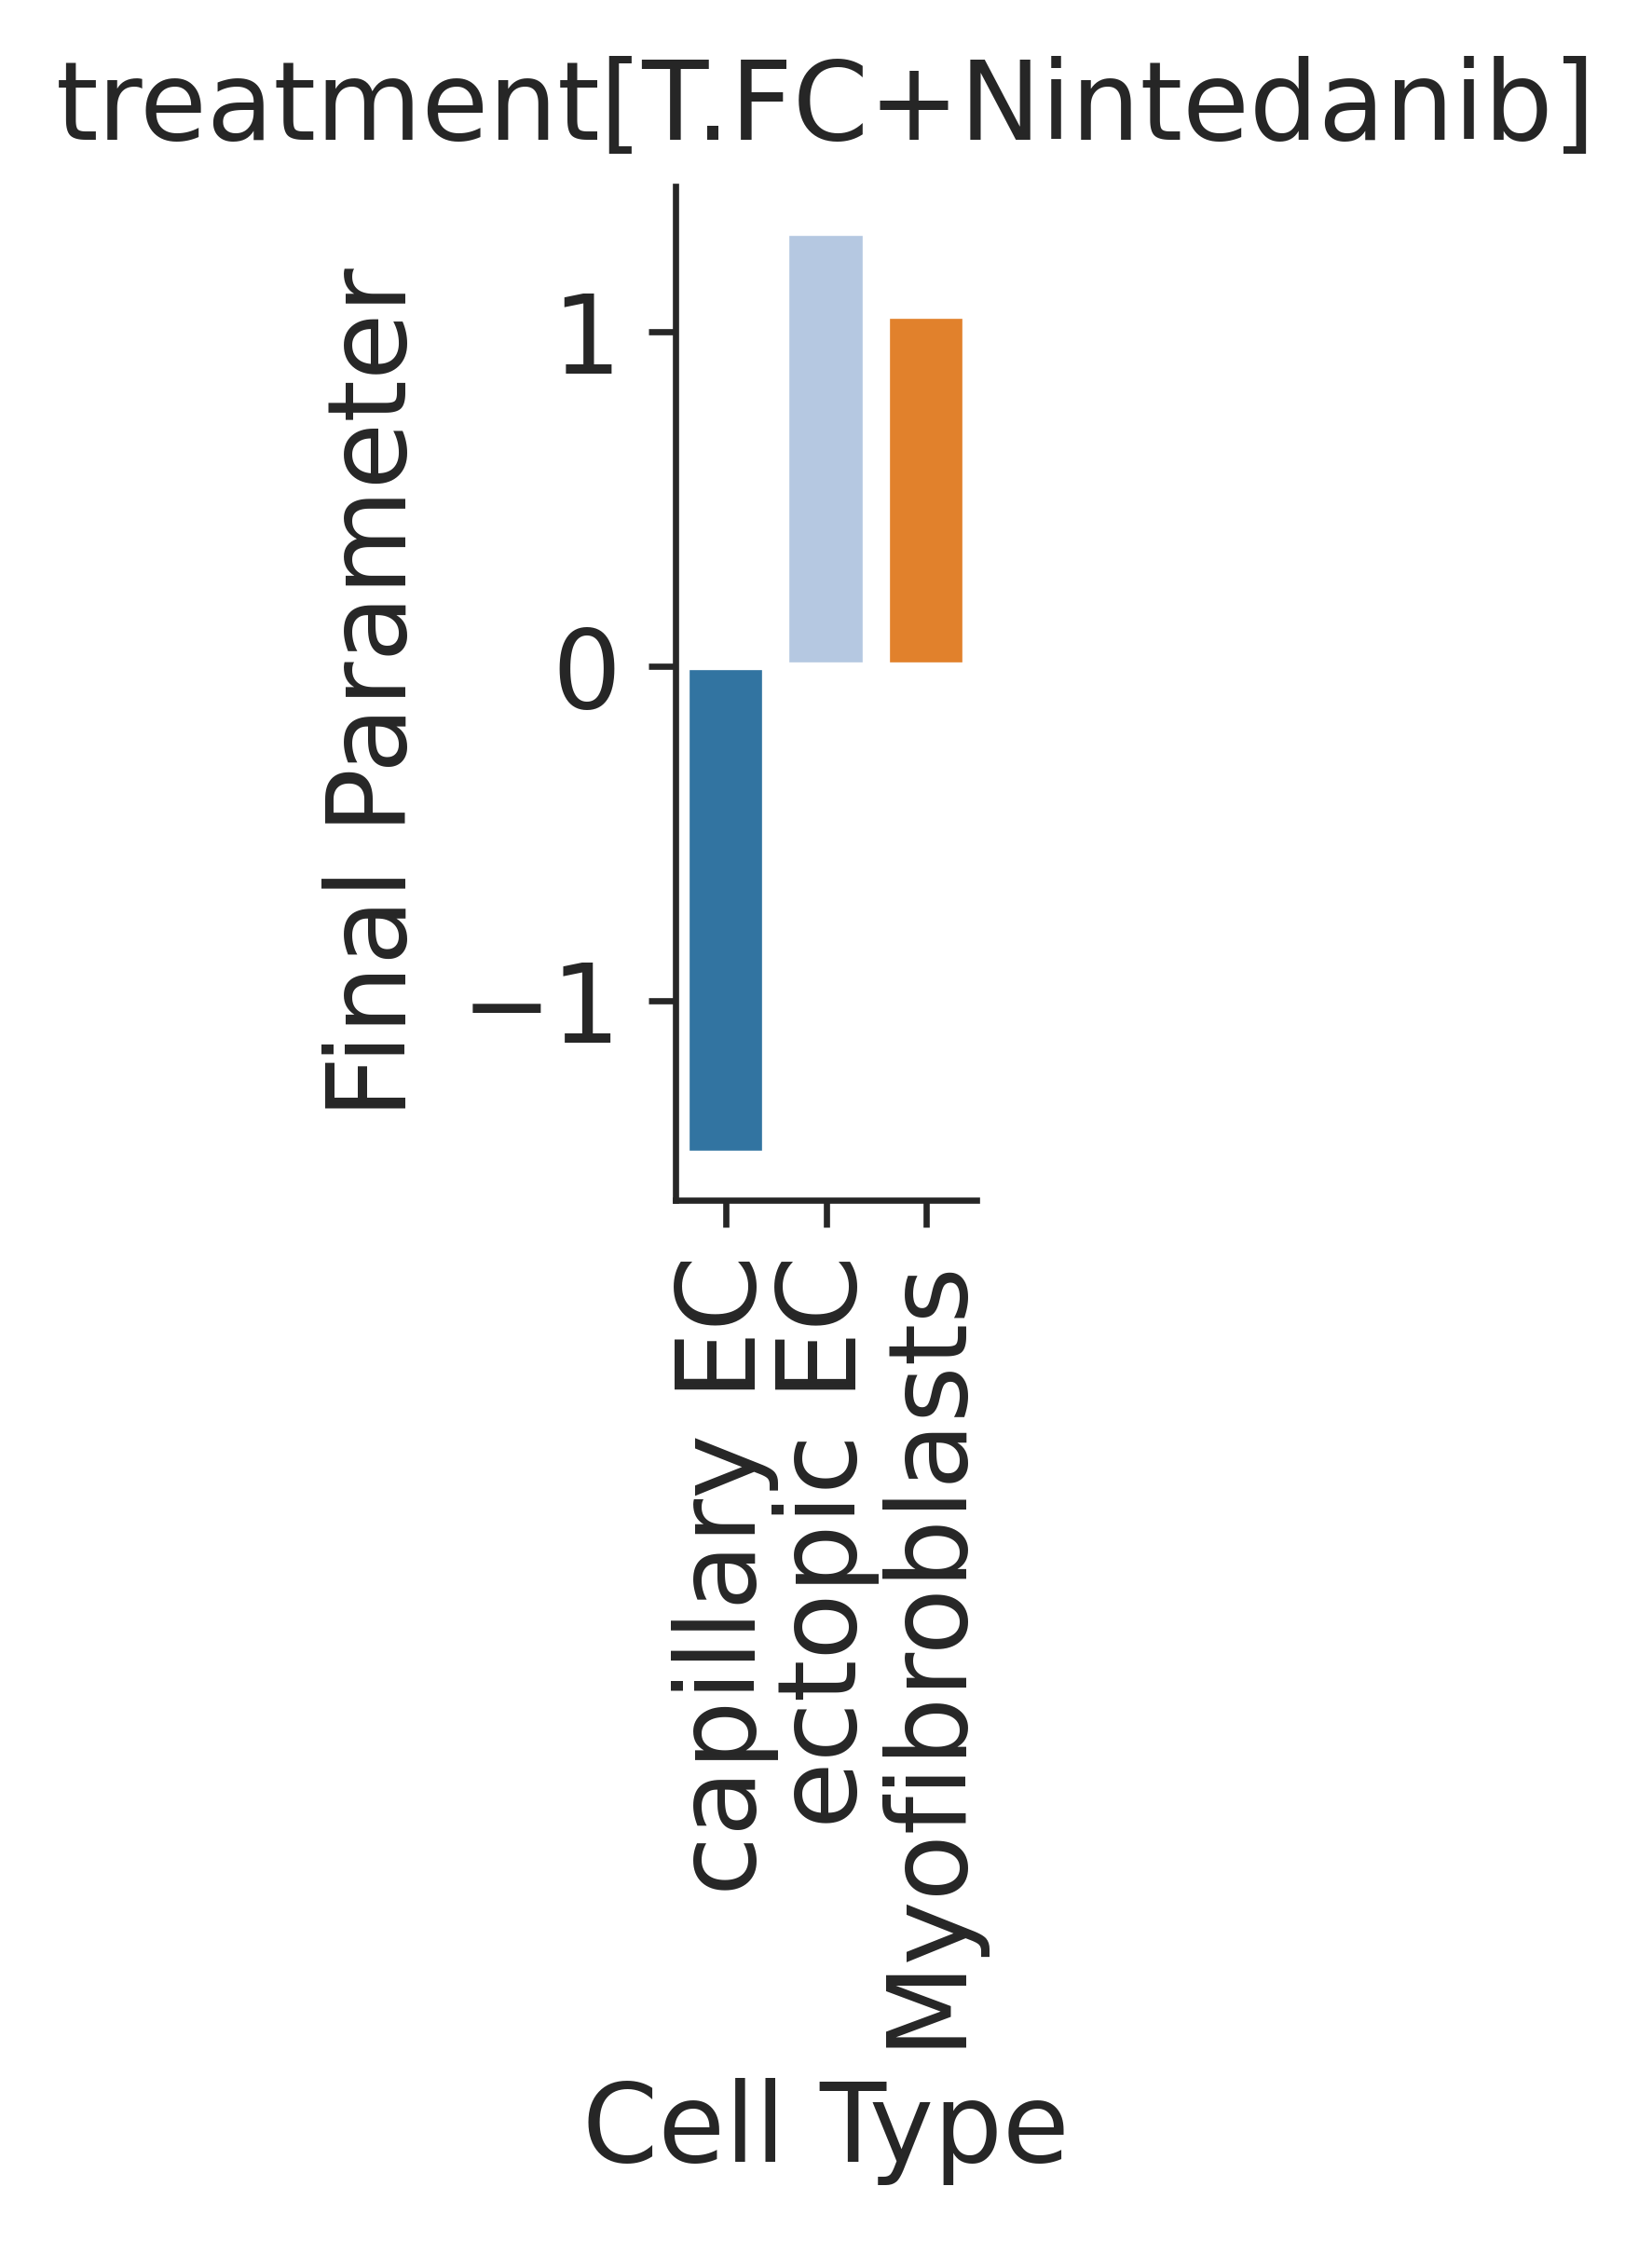

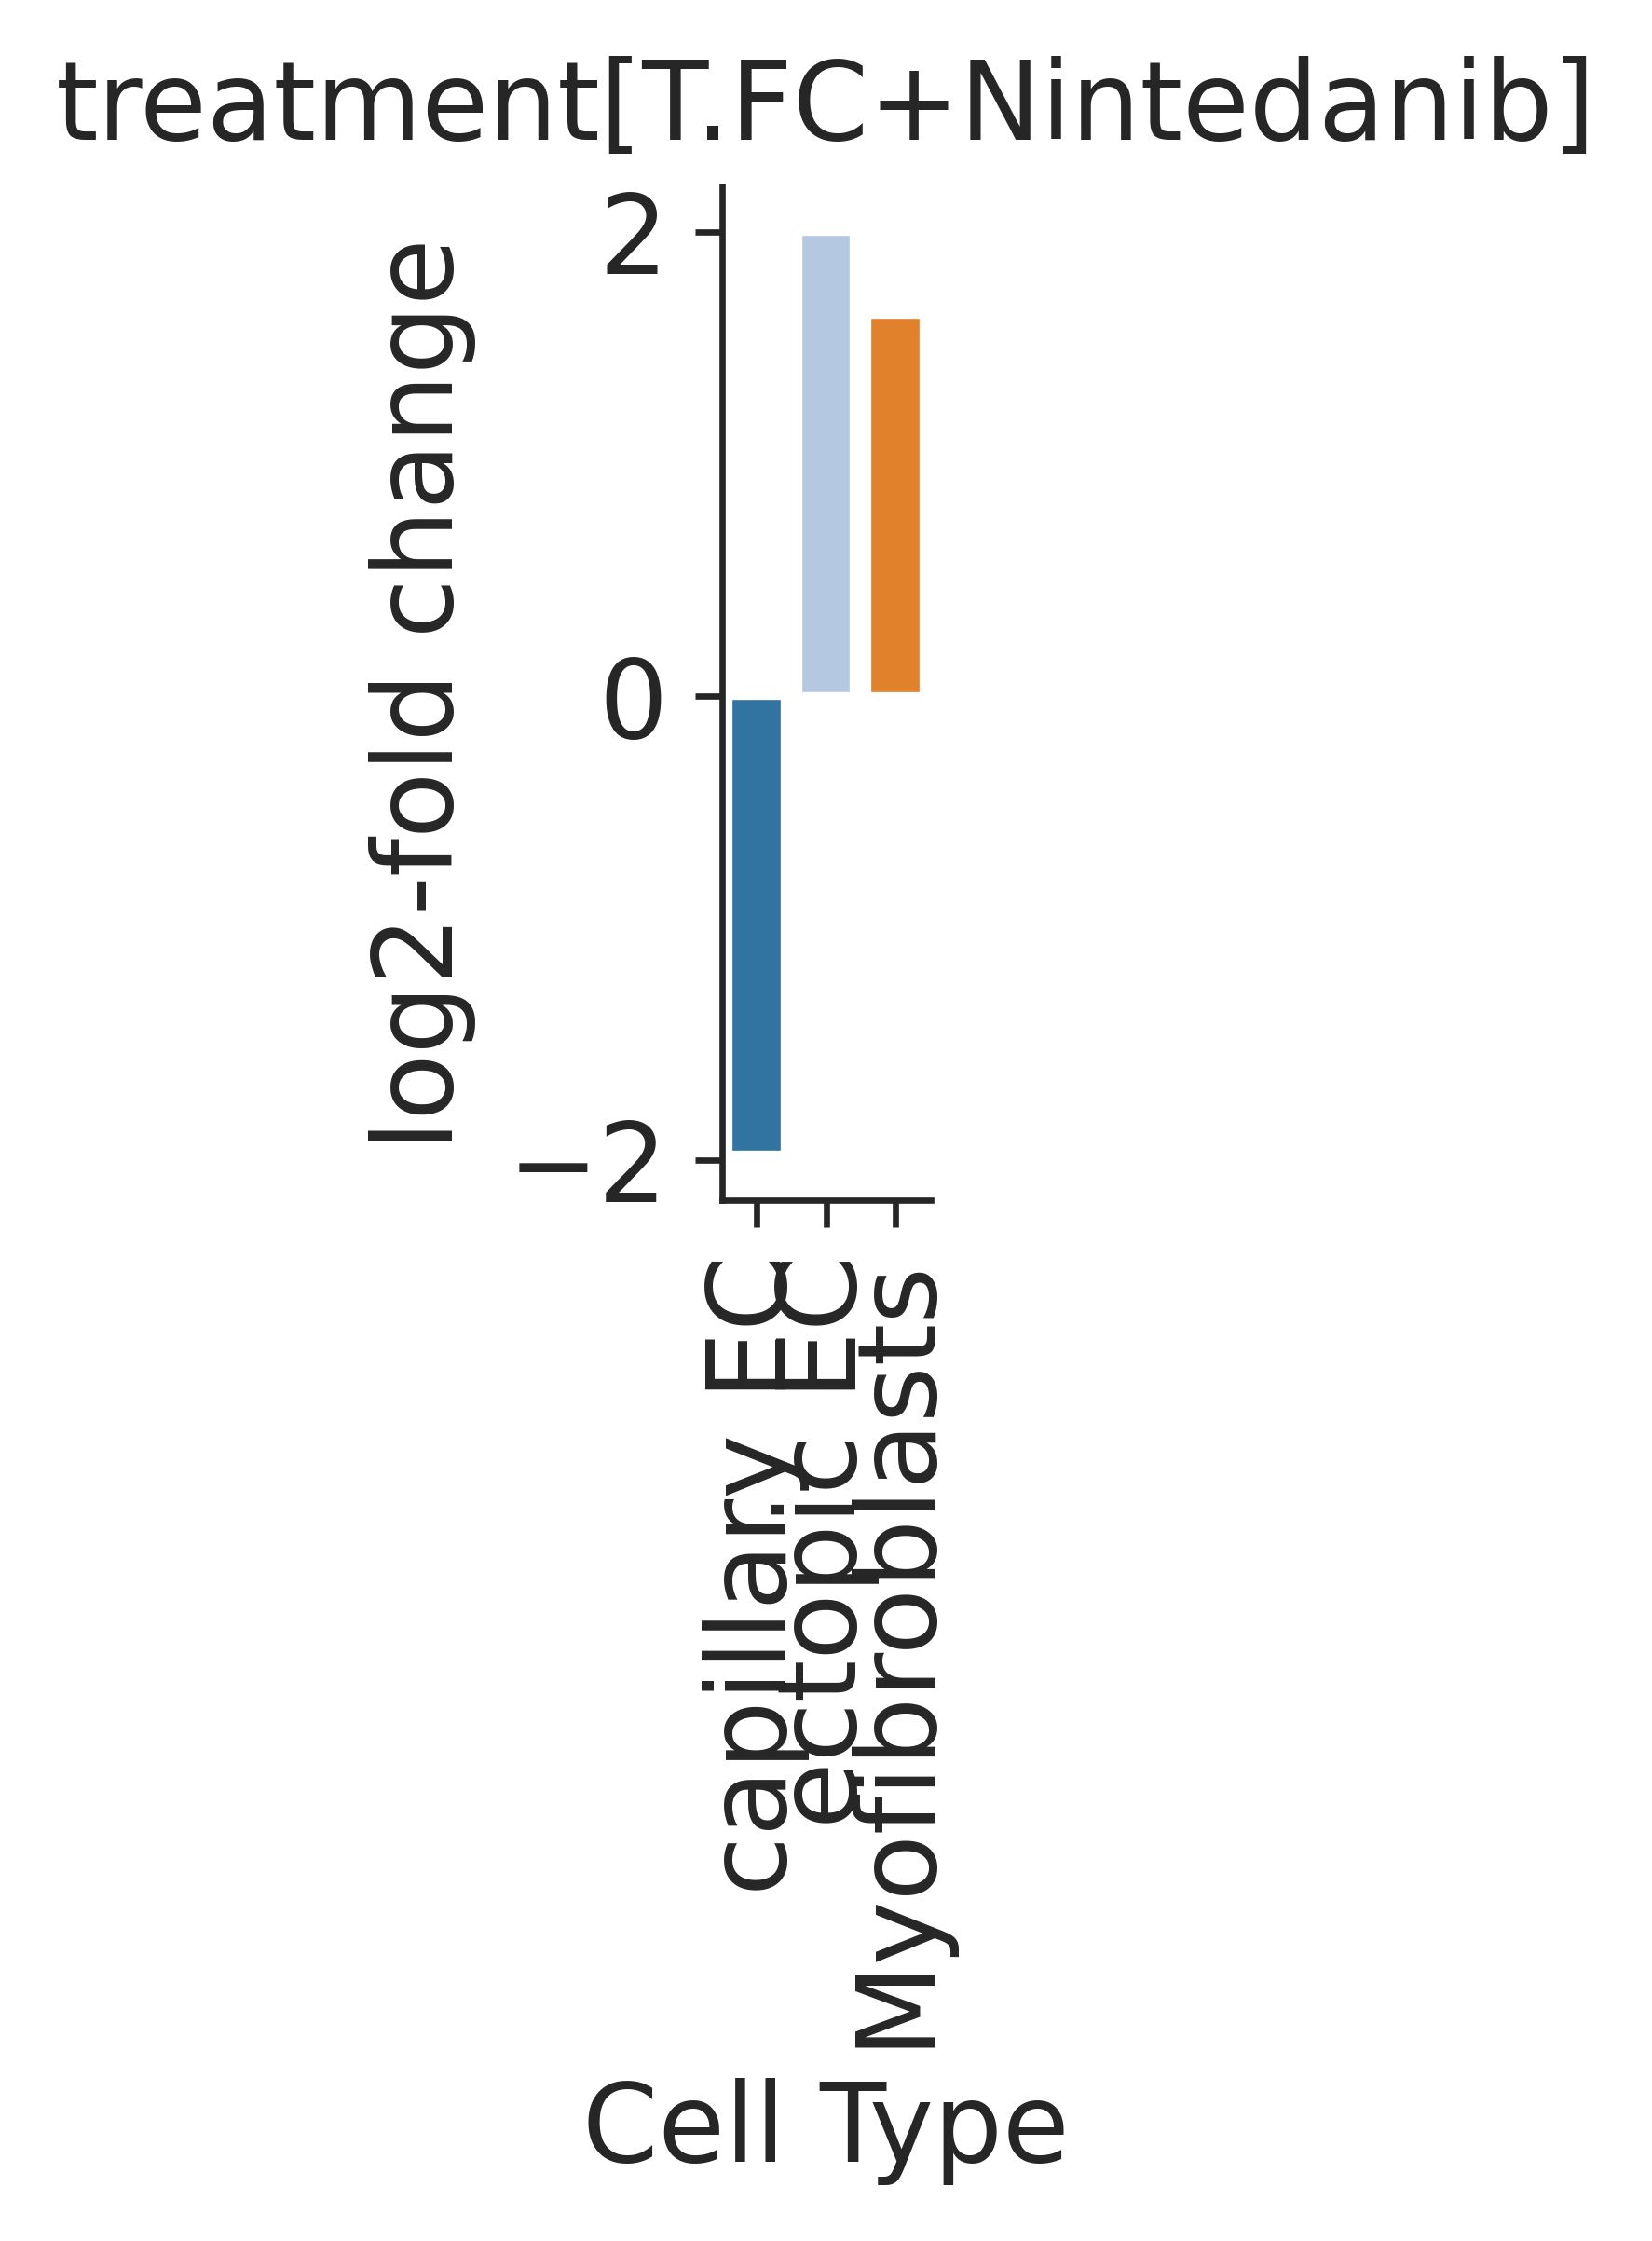

In [29]:
sccoda_model = pt.tl.Sccoda()

palette = {
    "CC": common_config.pt_blue,
    "FC": common_config.pt_orange,
    "FC+CMP4": common_config.pt_red,
    "FC+Nintedanib": "green",
}

for subset, condition in zip([adata_fc, adata_cmp4, adata_nintedanib], ["FC", "FC+CMP4", "FC+Nintedanib"]):
    sccoda_data = sccoda_model.load(
        subset,
        type="cell_level",
        generate_sample_level=True,
        cell_type_identifier="cell_type",
        sample_identifier="sample",
        covariate_obs=["treatment"],
    )
    
    sccoda_model.plot_boxplots(
        sccoda_data,
        modality_key="coda",
        feature_name="treatment",
        add_dots=True,
        cmap=palette,
    )
    fig = plt.gcf()
    fig.set_size_inches(30, 10)
    plt.savefig(f"figures/compositional_boxplot_{condition}_umap.png", bbox_inches="tight")

    sccoda_data = sccoda_model.prepare(
        sccoda_data,
        modality_key="coda",
        formula="treatment",
        reference_cell_type="automatic",
    )

    sccoda_model.run_nuts(sccoda_data, modality_key="coda")
        
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=0.1)
    
    effect_df = sccoda_data["coda"].varm[f"effect_df_treatment[T.{condition}]"]
    effect_df.loc[effect_df['log2-fold change'].abs() < 0.3, 'log2-fold change'] = 0
    
    sccoda_model.summary(sccoda_data, modality_key="coda")
    
    try:
        sccoda_model.plot_effects_barplot(
            sccoda_data, modality_key="coda", parameter="Final Parameter"
        )
        plt.savefig(f"figures/effects_barplot_{condition}_final_parameter.png", bbox_inches="tight")

        sccoda_model.plot_effects_barplot(
            sccoda_data, modality_key="coda", parameter="log2-fold change"
        )
        plt.savefig(f"figures/final_parameter_boxplot_{condition}_log2fc.png", bbox_inches="tight")
    except Exception:
        print(f"No effects found for {condition}")

## MILO

In [18]:
milo = pt.tl.Milo()
milo_data = milo.load(adata)

In [19]:
milo.make_nhoods(milo_data["rna"], prop=0.1)

In [20]:
print(f"Number of neighborhoods: {milo_data['rna'].obsm['nhoods'].shape[1]}")

Number of neighborhoods: 4408


Text(0, 0.5, '# nhoods')

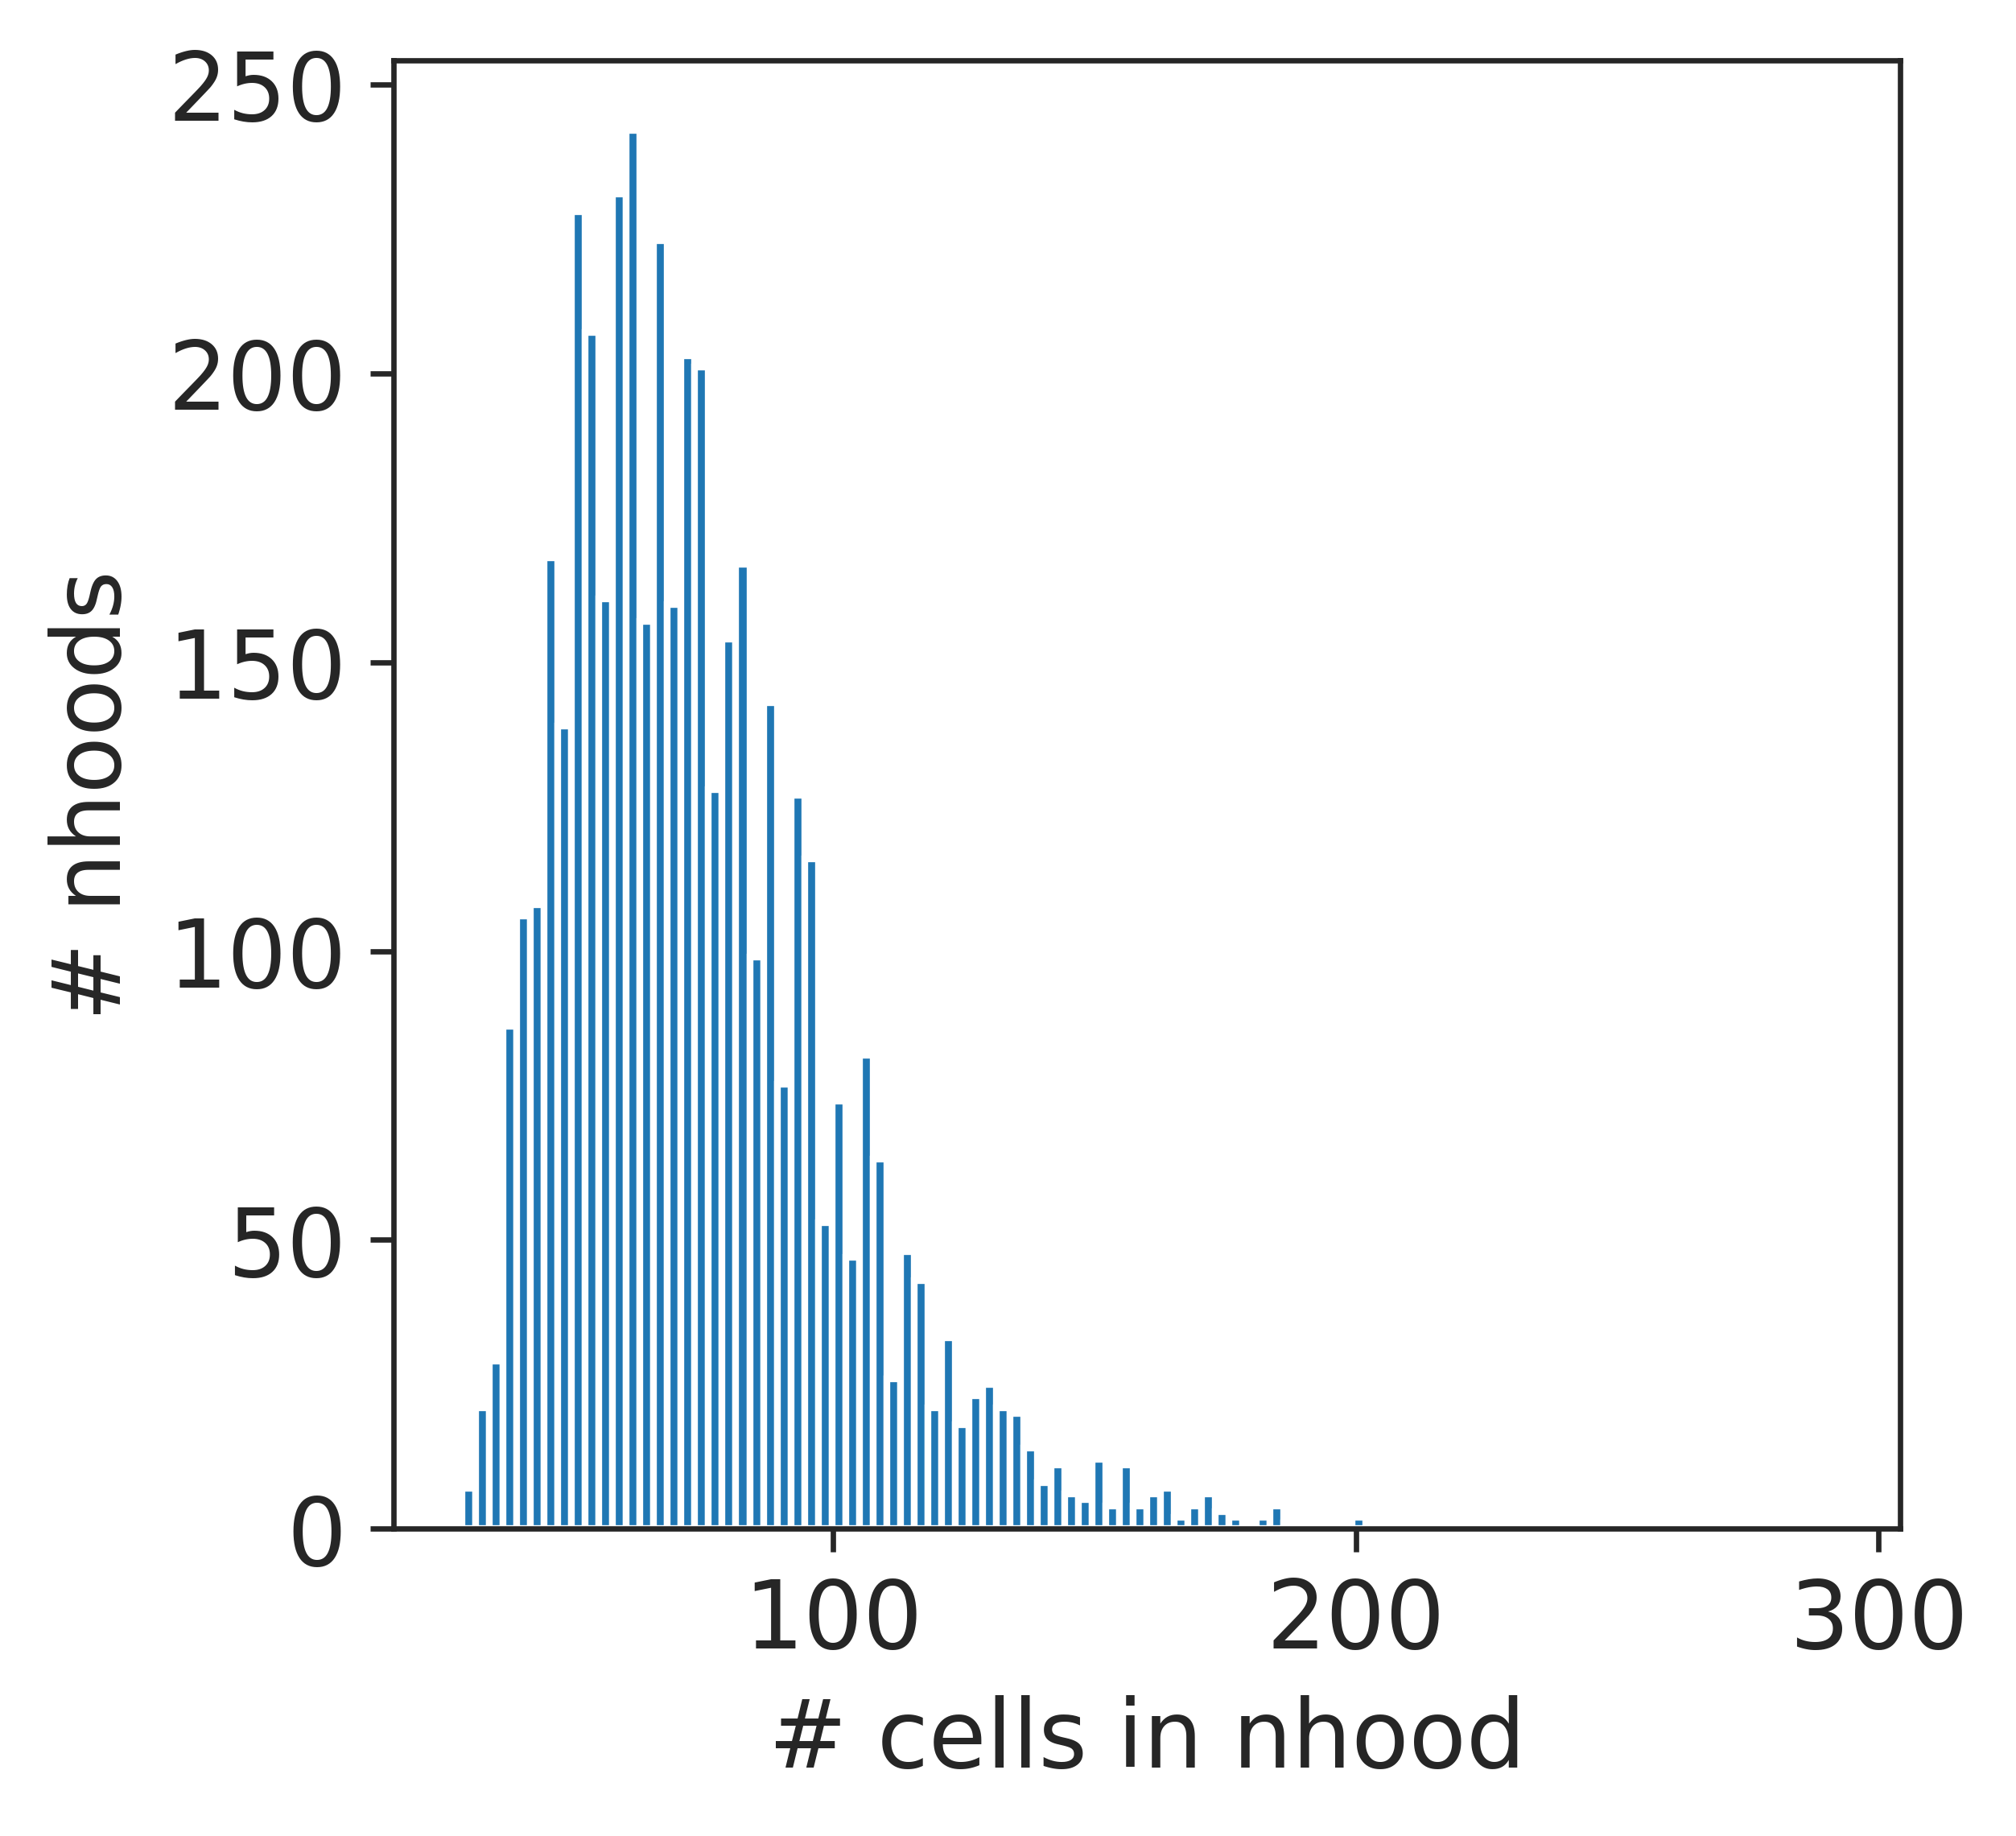

In [21]:
nhood_size = np.array(milo_data["rna"].obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100)
plt.xlabel("# cells in nhood")
plt.ylabel("# nhoods")

In [22]:
mdata = milo.count_nhoods(milo_data, sample_col="sample")

In [25]:
milo.da_nhoods(mdata, design="~treatment")

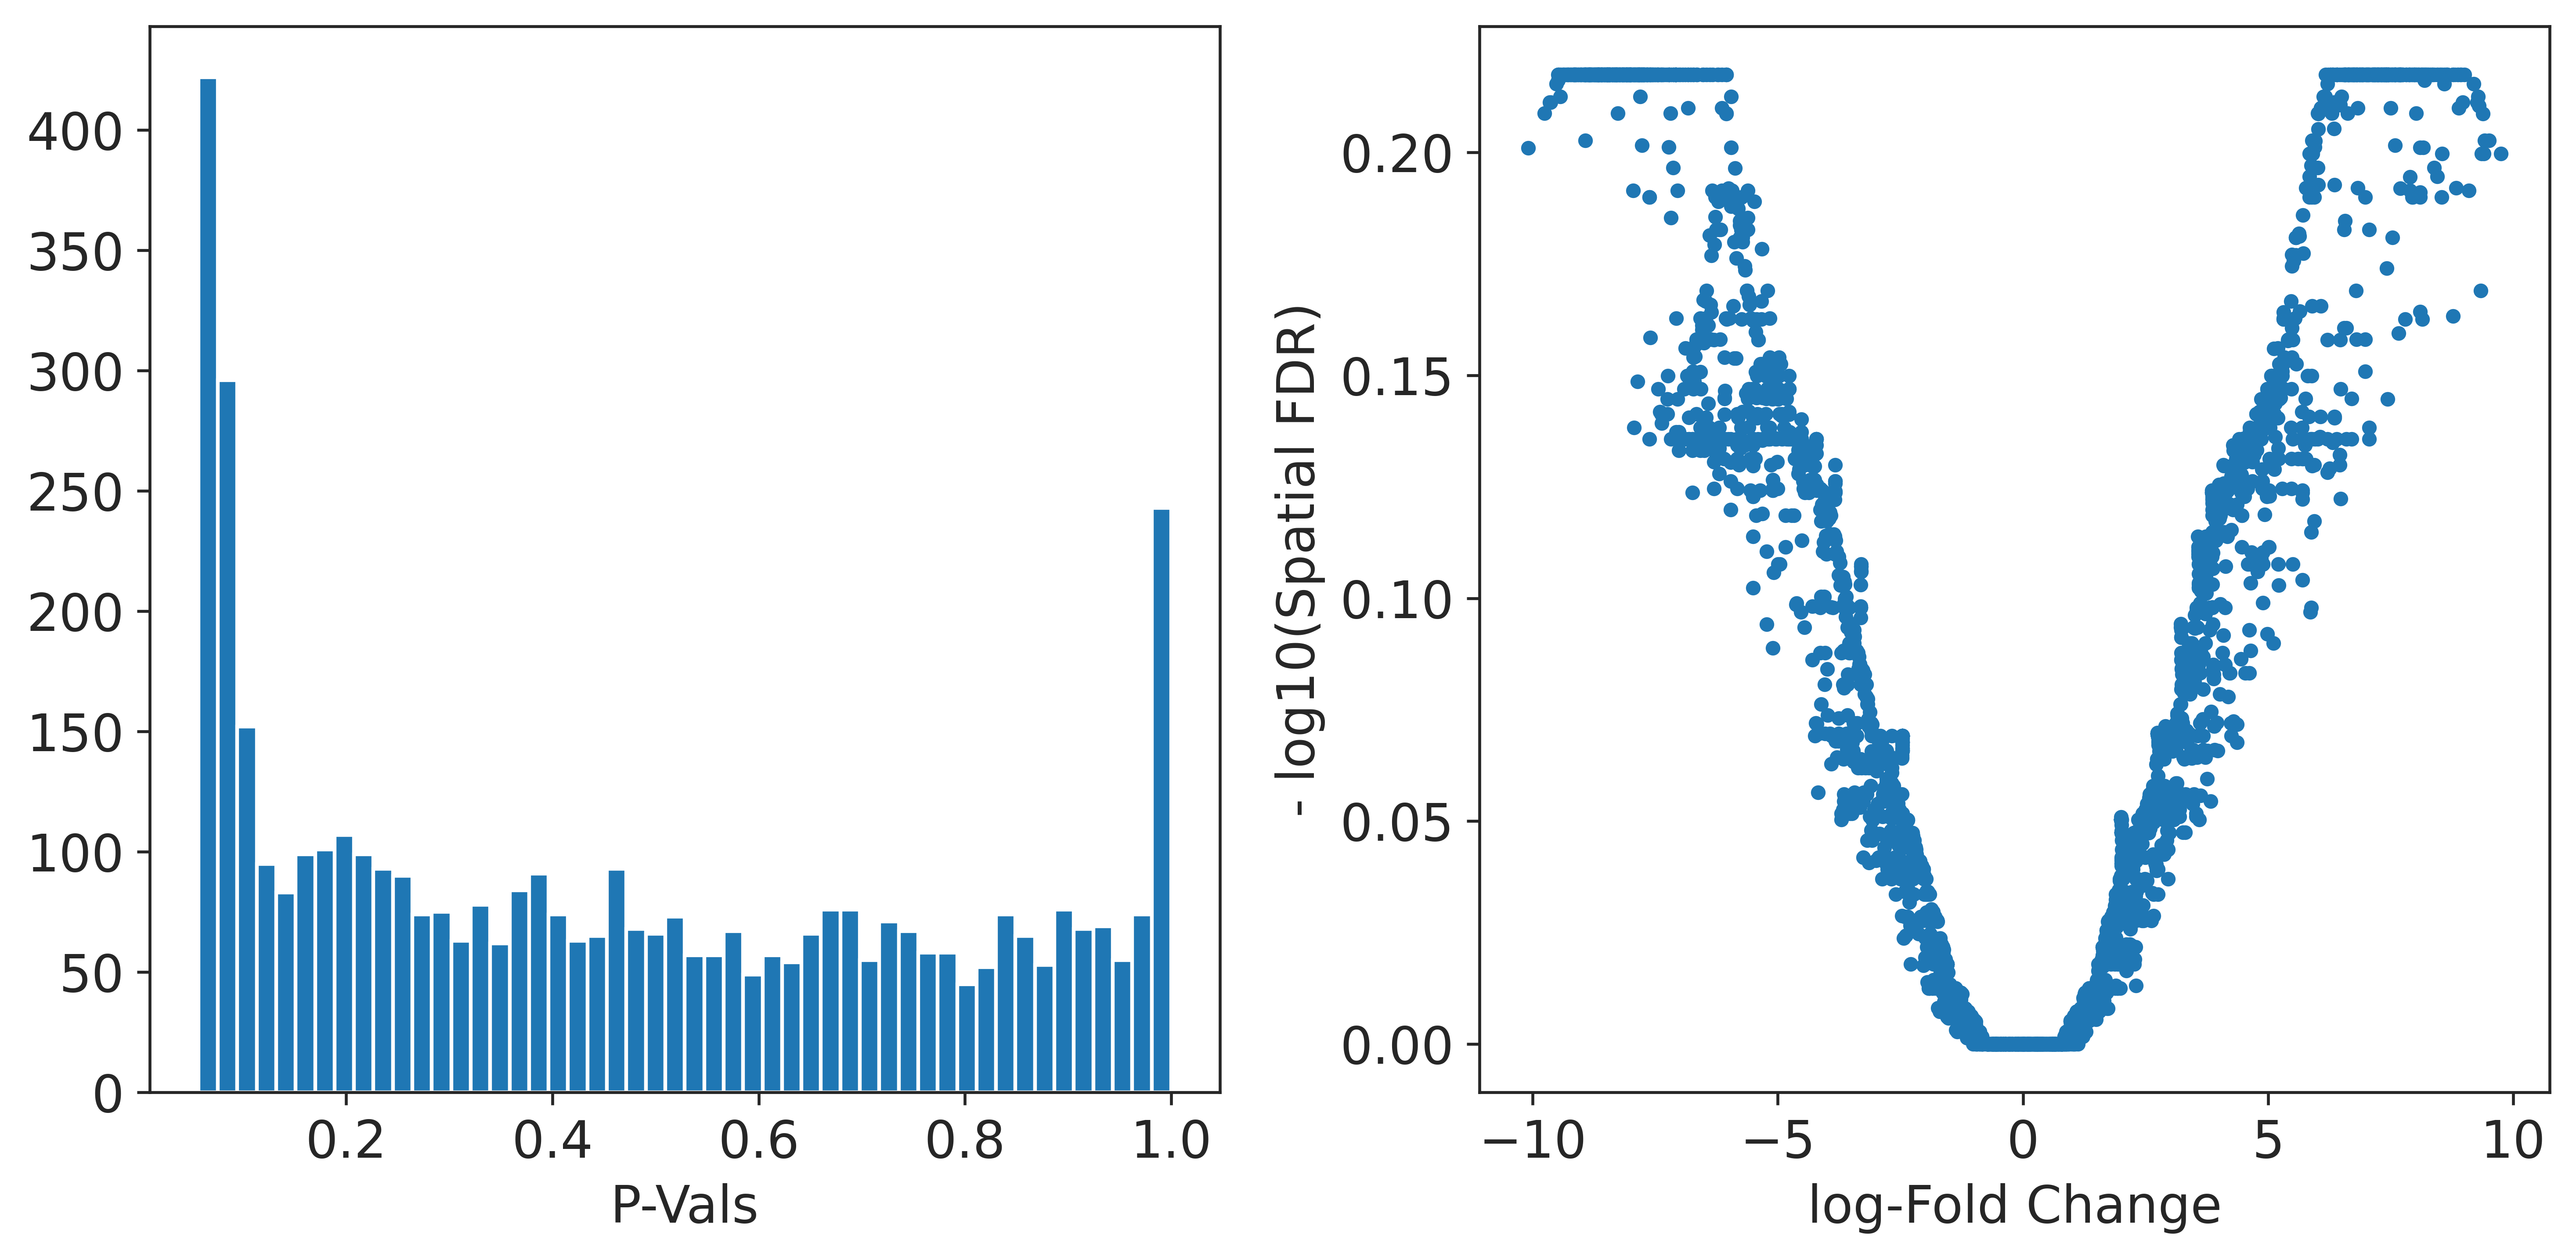

In [26]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()

In [27]:
milo.build_nhood_graph(mdata)

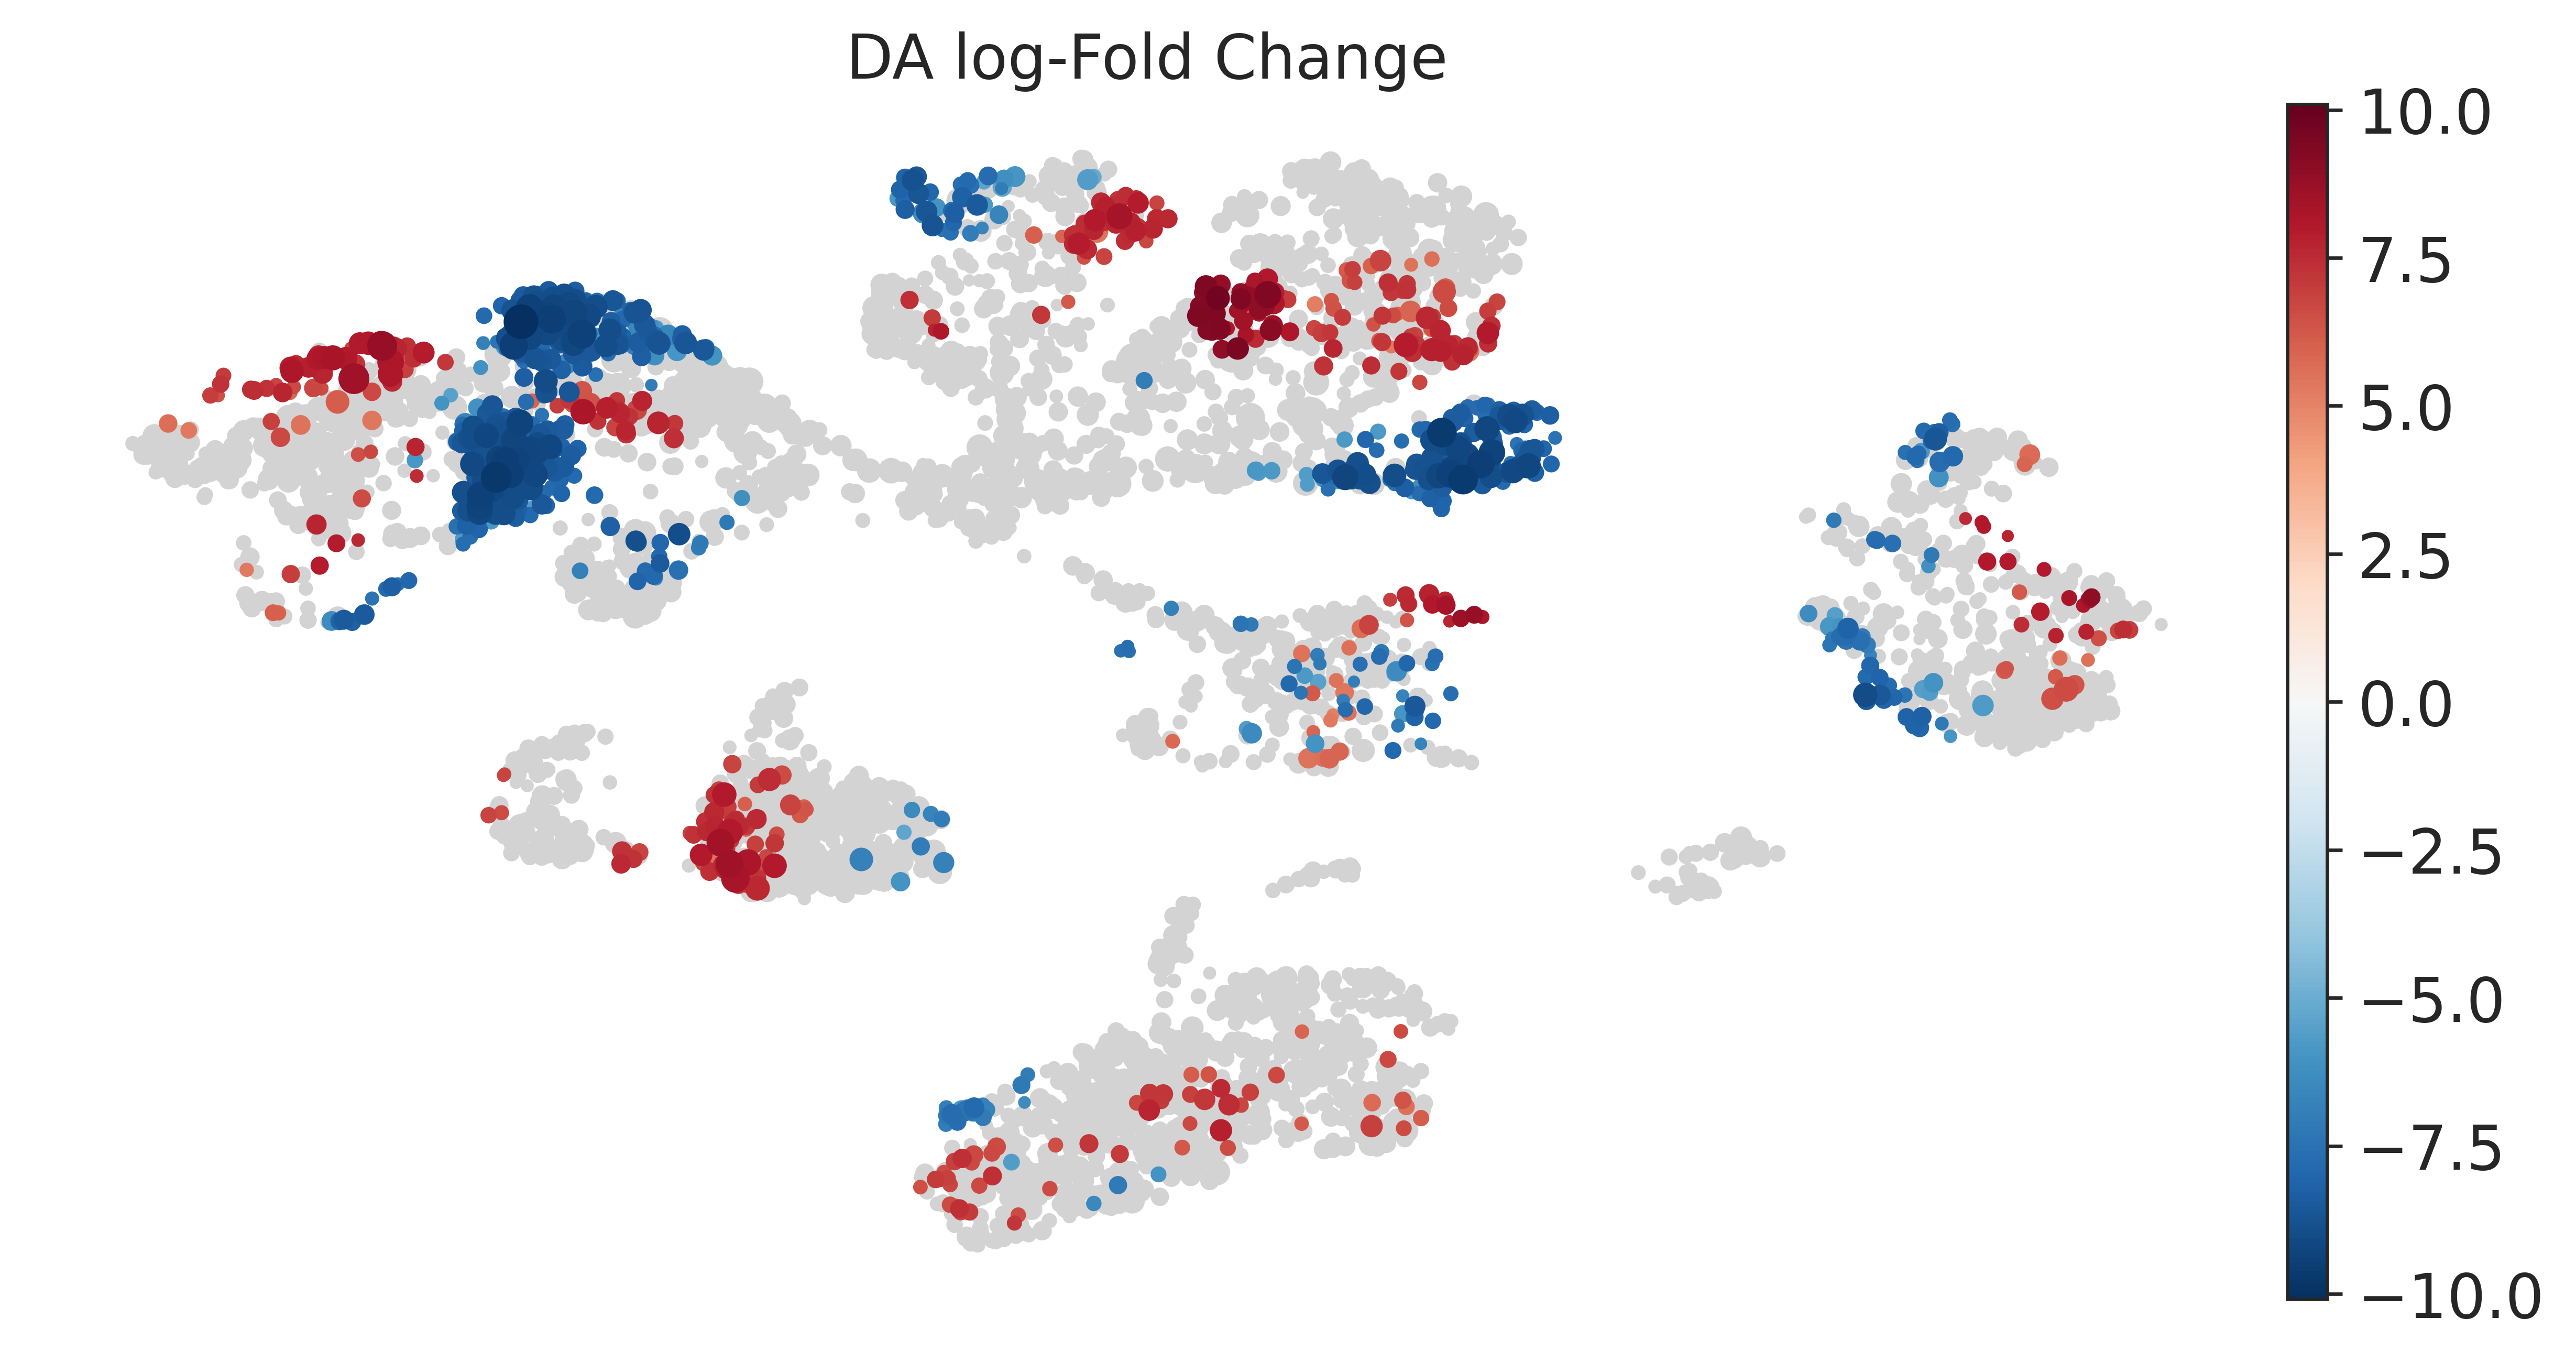

<Figure size 3000x1500 with 0 Axes>

In [28]:
milo.plot_nhood_graph(
    mdata,
    alpha=0.7,
    min_size=1,
)
plt.savefig("figures/milo_da_umap.png", bbox_inches="tight")

In [29]:
milo.annotate_nhoods(mdata, anno_col="cell_type")

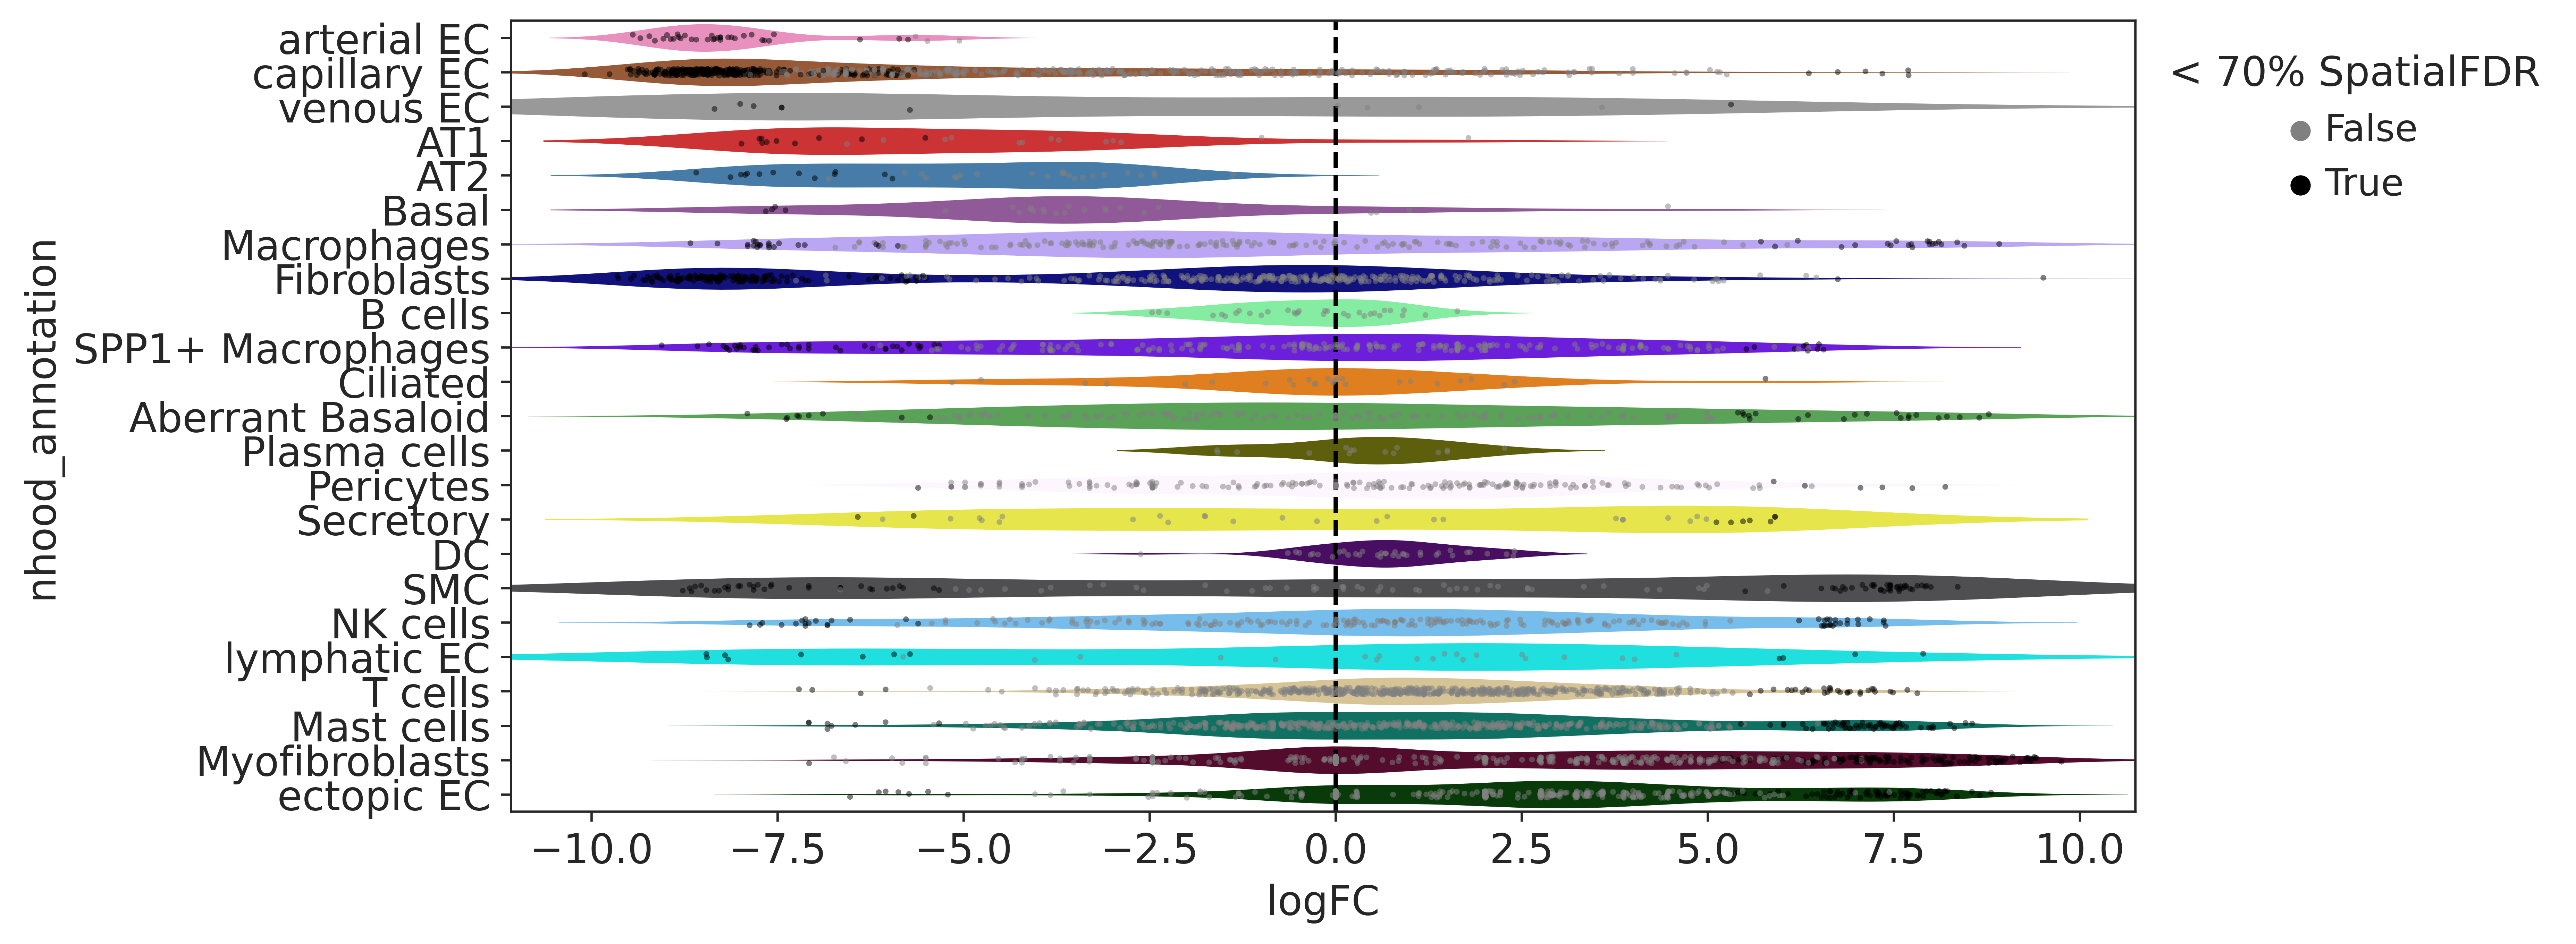

: 

In [30]:
pt.pl.milo.da_beeswarm(mdata, alpha=0.7)